In [2]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.graphics.tsaplots import plot_acf

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

## Análise Descritiva


In [3]:
# Carregar o dataset limpo do CSV
# Altere o caminho abaixo para o local correto do arquivo em seu computador
df_clean = pd.read_csv('cleaned_data.csv')
df_clean

,codigo_instituicao,instituicao,codigo_curso,curso,vagas_iniciais,colocados,nota_ultimo_colocado,vagas_sobrantes,ano,fase,taxa_ocupacao,nome_universidade,nome_faculdade,course_id
0,502,Universidade de Coimbra - Faculdade de Direito,0003,Administração Pública,50.0,30.0,116.0,20.0,2004,1,0.600000,Universidade de Coimbra,Faculdade de Direito,0003_0502
1,501,Universidade de Coimbra - Faculdade de Ciência...,0016,Antropologia,45.0,45.0,112.0,0.0,2004,1,1.000000,Universidade de Coimbra,Faculdade de Ciências e Tecnologia,0016_0501
2,804,Universidade Técnica de Lisboa - Instituto Sup...,0016,Antropologia,49.0,36.0,104.5,13.0,2004,1,0.734694,Universidade Técnica de Lisboa,Instituto Superior de Ciências Sociais e Polít...,0016_0804
3,902,Universidade Nova de Lisboa - Faculdade de Ciê...,0016,Antropologia,60.0,60.0,106.0,0.0,2004,1,1.000000,Universidade Nova de Lisboa,Faculdade de Ciências Sociais e Humanas,0016_0902
4,802,Universidade Técnica de Lisboa - Faculdade de ...,0021,Arquitectura de Design de Moda,30.0,30.0,156.0,0.0,2004,1,1.000000,Universidade Técnica de Lisboa,Faculdade de Arquitectura,0021_0802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18230,6810,ISCTE - Instituto Universitário de Lisboa (Sin...,L329,Tecnologias Digitais e Segurança de Informação,32.0,32.0,135.2,0.0,2024,1,1.000000,ISCTE,Instituto Universitário de Lisboa (Sintra),L329_6810
18231,3092,Instituto Politécnico da Guarda - Escola Super...,L335,Design de Equipamento e Ambientes,24.0,19.0,117.9,5.0,2024,1,0.791667,Instituto Politécnico da Guarda,Escola Superior de Tecnologia e Gestão,L335_3092
18232,140,Universidade dos Açores - Faculdade de Ciência...,L344,Guias de Natureza e Património,19.0,7.0,120.3,12.0,2024,1,0.368421,Universidade dos Açores,Faculdade de Ciências Agrárias e do Ambiente,L344_0140
18233,1203,Universidade de Trás-os-Montes e Alto Douro - ...,L345,Cidades Sustentáveis e Inteligentes,25.0,2.0,113.5,23.0,2024,1,0.080000,Universidade de Trás-os-Montes e Alto Douro,Escola de Ciências e Tecnologia,L345_1203


### Evolução dos Indicadores do Ensino Superior 


=== INDICADORES ESTATÍSTICOS GERAIS ===

Estatísticas Gerais:
- Total de vagas oferecidas: 890,192.0
- Total de colocados: 746,415.0
- Taxa de ocupação média: 77.7%
- Nota média do último colocado: 129.4


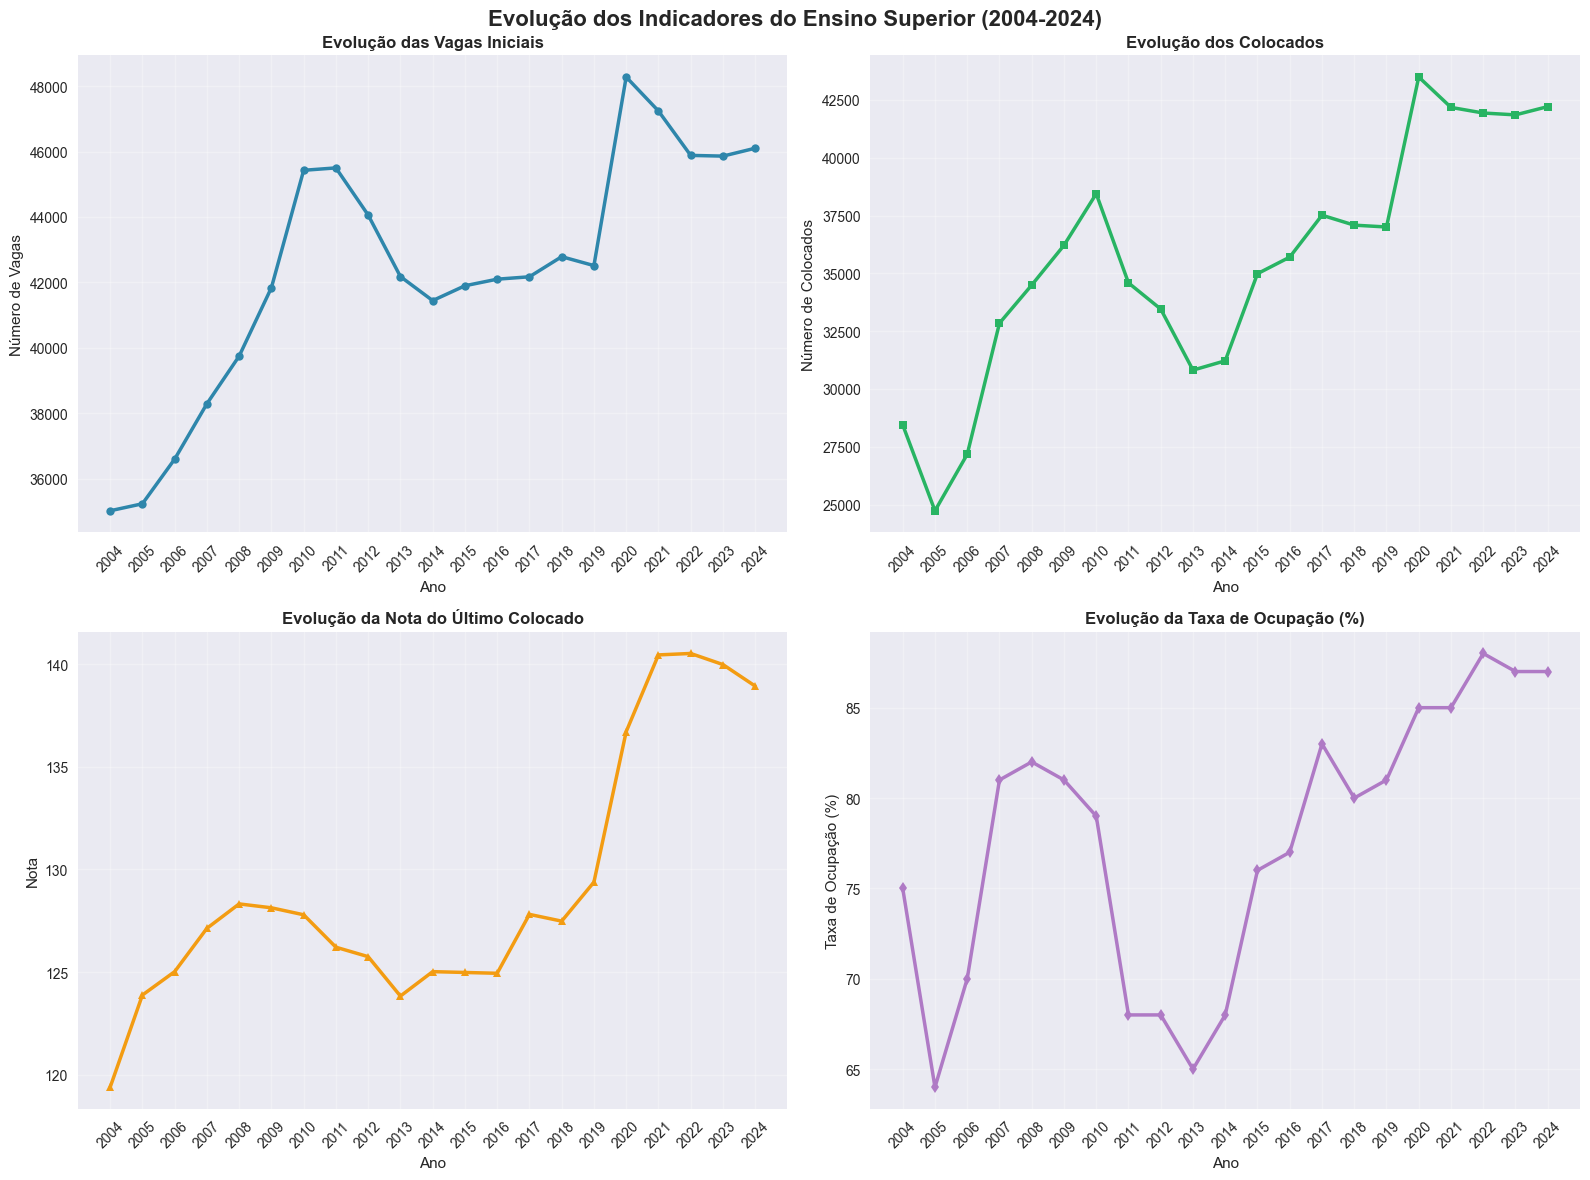

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')  # Estilo moderno
sns.set_palette("husl")        # Paleta suave

print("\n=== INDICADORES ESTATÍSTICOS GERAIS ===\n")

# Estatísticas gerais
print("Estatísticas Gerais:")
print(f"- Total de vagas oferecidas: {df_clean['vagas_iniciais'].sum():,}")
print(f"- Total de colocados: {df_clean['colocados'].sum():,}")
print(f"- Taxa de ocupação média: {df_clean['taxa_ocupacao'].mean():.1%}")
print(f"- Nota média do último colocado: {df_clean['nota_ultimo_colocado'].mean():.1f}")

# Estatísticas anuais agregadas
yearly_stats = df_clean.groupby('ano').agg({
    'vagas_iniciais': 'sum',
    'colocados': 'sum', 
    'taxa_ocupacao': 'mean',
    'nota_ultimo_colocado': 'mean'
}).round(2)

# Cores modernas e distintas
cor_vagas = '#2E86AB'
cor_colocados = '#28B463'
cor_nota = '#F39C12'
cor_ocupacao = '#AF7AC5'

# Gráficos com layout moderno
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Evolução dos Indicadores do Ensino Superior (2004-2024)', fontsize=16, fontweight='bold', y=0.98)

# Vagas Iniciais
axes[0, 0].plot(yearly_stats.index, yearly_stats['vagas_iniciais'], 
                marker='o', linewidth=2.5, markersize=6, color=cor_vagas)
axes[0, 0].set_title('Evolução das Vagas Iniciais', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Ano')
axes[0, 0].set_ylabel('Número de Vagas')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(yearly_stats.index)
axes[0, 0].tick_params(axis='x', rotation=45)

# Colocados
axes[0, 1].plot(yearly_stats.index, yearly_stats['colocados'], 
                marker='s', linewidth=2.5, markersize=6, color=cor_colocados)
axes[0, 1].set_title('Evolução dos Colocados', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Ano')
axes[0, 1].set_ylabel('Número de Colocados')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(yearly_stats.index)
axes[0, 1].tick_params(axis='x', rotation=45)

# Nota do Último Colocado
axes[1, 0].plot(yearly_stats.index, yearly_stats['nota_ultimo_colocado'], 
                marker='^', linewidth=2.5, markersize=6, color=cor_nota)
axes[1, 0].set_title('Evolução da Nota do Último Colocado', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Ano')
axes[1, 0].set_ylabel('Nota')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(yearly_stats.index)
axes[1, 0].tick_params(axis='x', rotation=45)

# Taxa de Ocupação
axes[1, 1].plot(yearly_stats.index, yearly_stats['taxa_ocupacao'] * 100, 
                marker='d', linewidth=2.5, markersize=6, color=cor_ocupacao)
axes[1, 1].set_title('Evolução da Taxa de Ocupação (%)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Ano')
axes[1, 1].set_ylabel('Taxa de Ocupação (%)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks(yearly_stats.index)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [5]:
#A nota média do último colocado
nota_media_ultimo_colocado = df_clean['nota_ultimo_colocado'].mean()
print(f"\nNota média do último colocado: {nota_media_ultimo_colocado:.1f}")
# Taxa de ocupação média
taxa_ocupacao_media = df_clean['taxa_ocupacao'].mean()  
print(f"Taxa de ocupação média: {taxa_ocupacao_media:.1%}") 



Nota média do último colocado: 129.4
Taxa de ocupação média: 77.7%


In [6]:
#Forma de exibir os dados com graficos não modernos 
'''
# ============================================================================
# GENERAL STATISTICAL INDICATORS
# ============================================================================

print("\n=== INDICADORES ESTATÍSTICOS GERAIS ===\n")

# Overall statistics
print("Estatísticas Gerais:")
print(f"- Total de vagas oferecidas: {df_clean['vagas_iniciais'].sum():,}")
print(f"- Total de colocados: {df_clean['colocados'].sum():,}")
print(f"- Taxa de ocupação média: {df_clean['taxa_ocupacao'].mean():.1%}")
print(f"- Nota média do último colocado: {df_clean['nota_ultimo_colocado'].mean():.1f}")

# Statistics by year - Visual representation
yearly_stats = df_clean.groupby('ano').agg({
    'vagas_iniciais': 'sum',
    'colocados': 'sum', 
    'taxa_ocupacao': 'mean',
    'nota_ultimo_colocado': 'mean'
}).round(2)

# Create 4 separate figures
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Vagas Iniciais
ax1.plot(yearly_stats.index, yearly_stats['vagas_iniciais'], 'b-')
ax1.set_title('Evolução das Vagas Iniciais')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Número de Vagas')
ax1.set_xticks(yearly_stats.index)
ax1.set_xticklabels(yearly_stats.index, rotation=45)

# Plot 2: Colocados
ax2.plot(yearly_stats.index, yearly_stats['colocados'], 'g-')
ax2.set_title('Evolução dos Colocados')
ax2.set_xlabel('Ano')
ax2.set_ylabel('Número de Colocados')
ax2.set_xticks(yearly_stats.index)
ax2.set_xticklabels(yearly_stats.index, rotation=45)

# Plot 3: Nota Último Colocado
ax3.plot(yearly_stats.index, yearly_stats['nota_ultimo_colocado'], 'r-')
ax3.set_title('Evolução da Nota do Último Colocado')
ax3.set_xlabel('Ano')
ax3.set_ylabel('Nota')
ax3.set_xticks(yearly_stats.index)
ax3.set_xticklabels(yearly_stats.index, rotation=45)

# Plot 4: Taxa de Ocupação
ax4.plot(yearly_stats.index, yearly_stats['taxa_ocupacao']*100, 'y-')
ax4.set_title('Evolução da Taxa de Ocupação')
ax4.set_xlabel('Ano')
ax4.set_ylabel('Taxa de Ocupação (%)')
ax4.set_xticks(yearly_stats.index)
ax4.set_xticklabels(yearly_stats.index, rotation=45)

plt.tight_layout()
plt.show()

'''

'\n# ============================================================================\n# GENERAL STATISTICAL INDICATORS\n# ============================================================================\n\nprint("\n=== INDICADORES ESTATÍSTICOS GERAIS ===\n")\n\n# Overall statistics\nprint("Estatísticas Gerais:")\nprint(f"- Total de vagas oferecidas: {df_clean[\'vagas_iniciais\'].sum():,}")\nprint(f"- Total de colocados: {df_clean[\'colocados\'].sum():,}")\nprint(f"- Taxa de ocupação média: {df_clean[\'taxa_ocupacao\'].mean():.1%}")\nprint(f"- Nota média do último colocado: {df_clean[\'nota_ultimo_colocado\'].mean():.1f}")\n\n# Statistics by year - Visual representation\nyearly_stats = df_clean.groupby(\'ano\').agg({\n    \'vagas_iniciais\': \'sum\',\n    \'colocados\': \'sum\', \n    \'taxa_ocupacao\': \'mean\',\n    \'nota_ultimo_colocado\': \'mean\'\n}).round(2)\n\n# Create 4 separate figures\nfig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))\n\n# Plot 1: Vagas Iniciais\n

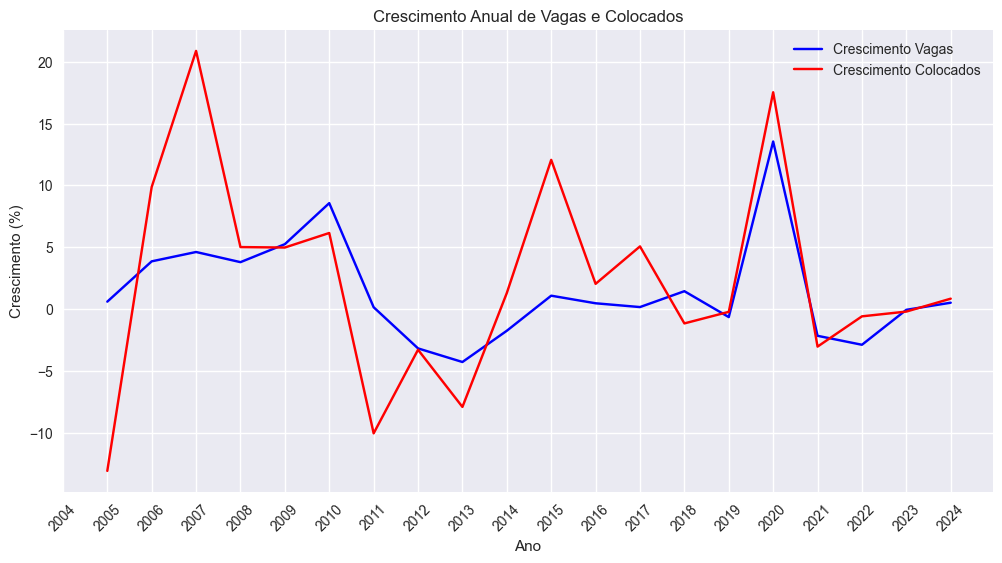

In [7]:
# ============================================================================
# 4. INDICADORES TEMPORAIS / TENDÊNCIAS
# ============================================================================

# Calcula métricas anuais de procura 
yearly_demand = df_clean.groupby('ano').agg({
    'vagas_iniciais': 'sum',  # Soma total de vagas por ano
    'colocados': 'sum',       # Soma total de colocados por ano
    'instituicao': 'nunique', # Número de instituições únicas por ano
    'curso': 'nunique'        # Número de cursos únicos por ano
})

# Calcula taxas de crescimento anual
yearly_demand['crescimento_vagas'] = yearly_demand['vagas_iniciais'].pct_change() * 100
yearly_demand['crescimento_colocados'] = yearly_demand['colocados'].pct_change() * 100

# Gráfico das taxas de crescimento ao longo do tempo 
plt.figure(figsize=(12,6))
plt.plot(yearly_demand.index, yearly_demand['crescimento_vagas'], 'b-', label='Crescimento Vagas')
plt.plot(yearly_demand.index, yearly_demand['crescimento_colocados'], 'r-', label='Crescimento Colocados')
plt.title('Crescimento Anual de Vagas e Colocados')
plt.xlabel('Ano')
plt.ylabel('Crescimento (%)')
plt.legend()
plt.grid(True)
plt.xticks(yearly_demand.index, rotation=45)
plt.show()

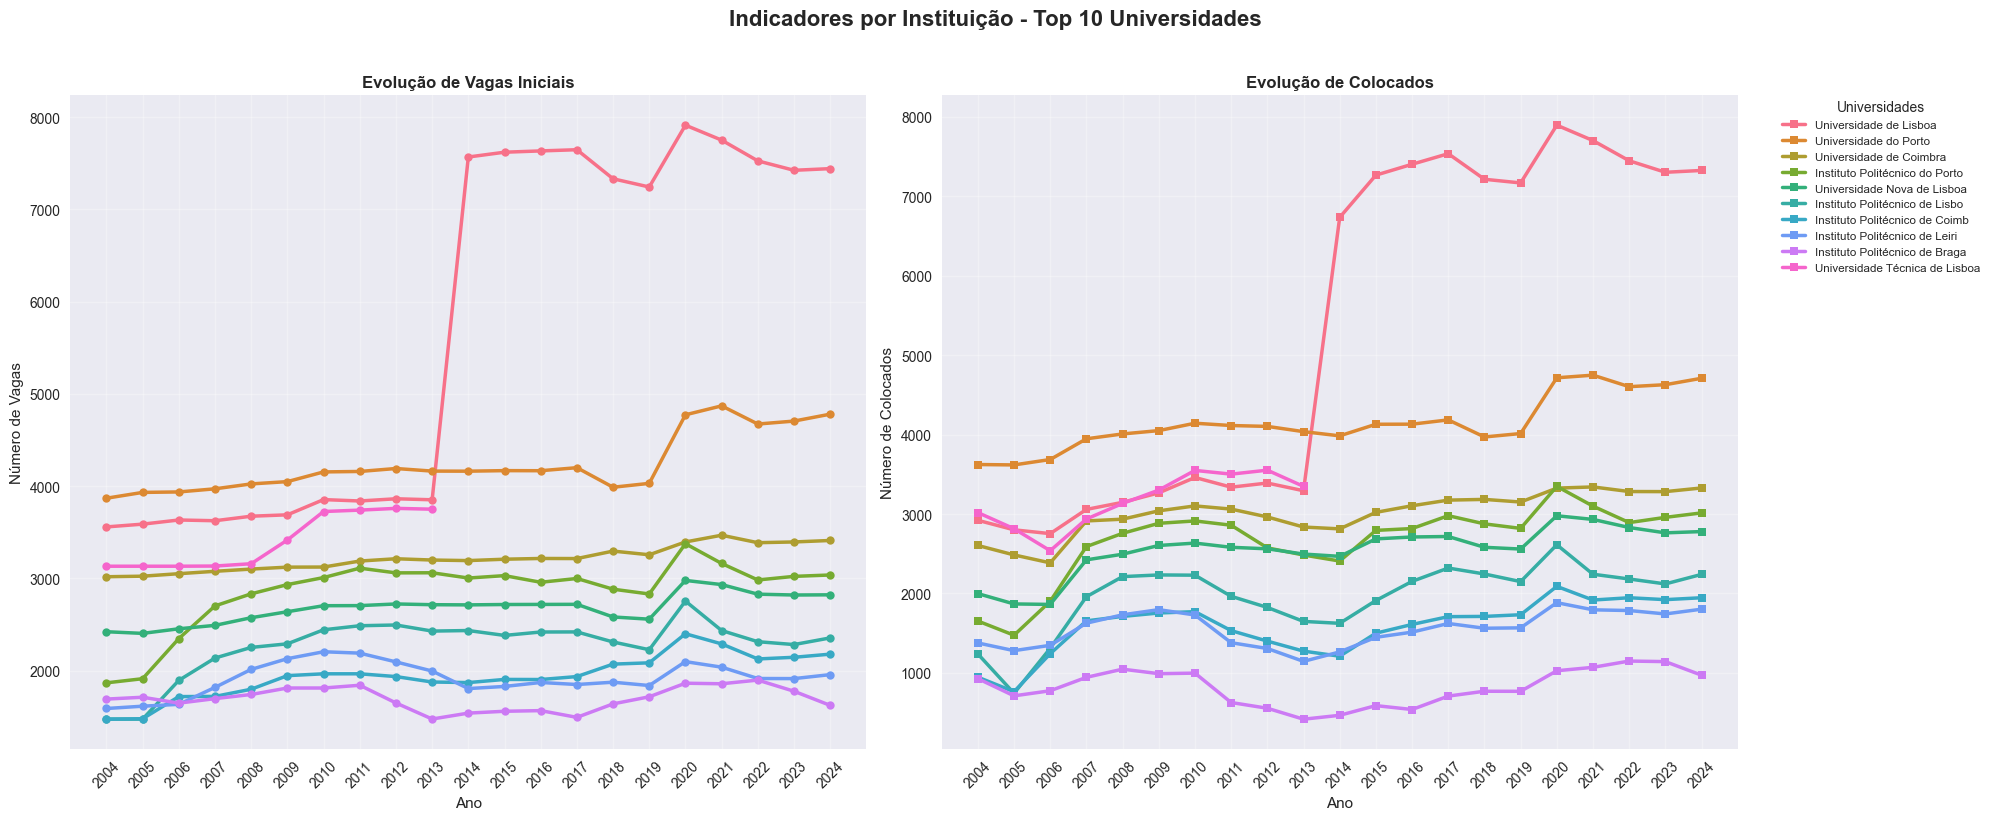

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# ============================================================================
# 5. INDICADORES POR CURSO/INSTITUIÇÃO (versão moderna)
# ============================================================================

# Calcula métricas históricas de competitividade por curso
course_competition = df_clean.groupby('curso').agg({
    'vagas_iniciais': 'sum',
    'colocados': 'sum',
    'taxa_ocupacao': 'mean',
    'nota_ultimo_colocado': 'mean'
}).round(2)

# Seleciona as 10 maiores universidades em vagas
top_institutions = df_clean.groupby('nome_universidade')['vagas_iniciais'].sum()\
                    .sort_values(ascending=False).head(10).index
colors = sns.color_palette("husl", len(top_institutions))  # Paleta harmonizada

# Cria figura com dois subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Indicadores por Instituição - Top 10 Universidades', fontsize=16, fontweight='bold', y=1.02)

# Gráfico: Evolução de Vagas
for inst, color in zip(top_institutions, colors):
    data = df_clean[df_clean['nome_universidade'] == inst]
    yearly_data = data.groupby('ano')['vagas_iniciais'].sum()
    ax1.plot(yearly_data.index, yearly_data.values, marker='o', linewidth=2.5, markersize=6, label=inst[:30], color=color)

ax1.set_title('Evolução de Vagas Iniciais', fontsize=12, fontweight='bold')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Número de Vagas')
ax1.set_xticks(sorted(df_clean['ano'].unique()))
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Gráfico: Evolução de Colocados
for inst, color in zip(top_institutions, colors):
    data = df_clean[df_clean['nome_universidade'] == inst]
    yearly_data = data.groupby('ano')['colocados'].sum()
    ax2.plot(yearly_data.index, yearly_data.values, marker='s', linewidth=2.5, markersize=6, label=inst[:30], color=color)

ax2.set_title('Evolução de Colocados', fontsize=12, fontweight='bold')
ax2.set_xlabel('Ano')
ax2.set_ylabel('Número de Colocados')
ax2.set_xticks(sorted(df_clean['ano'].unique()))
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small', title="Universidades")

plt.tight_layout()
plt.show()


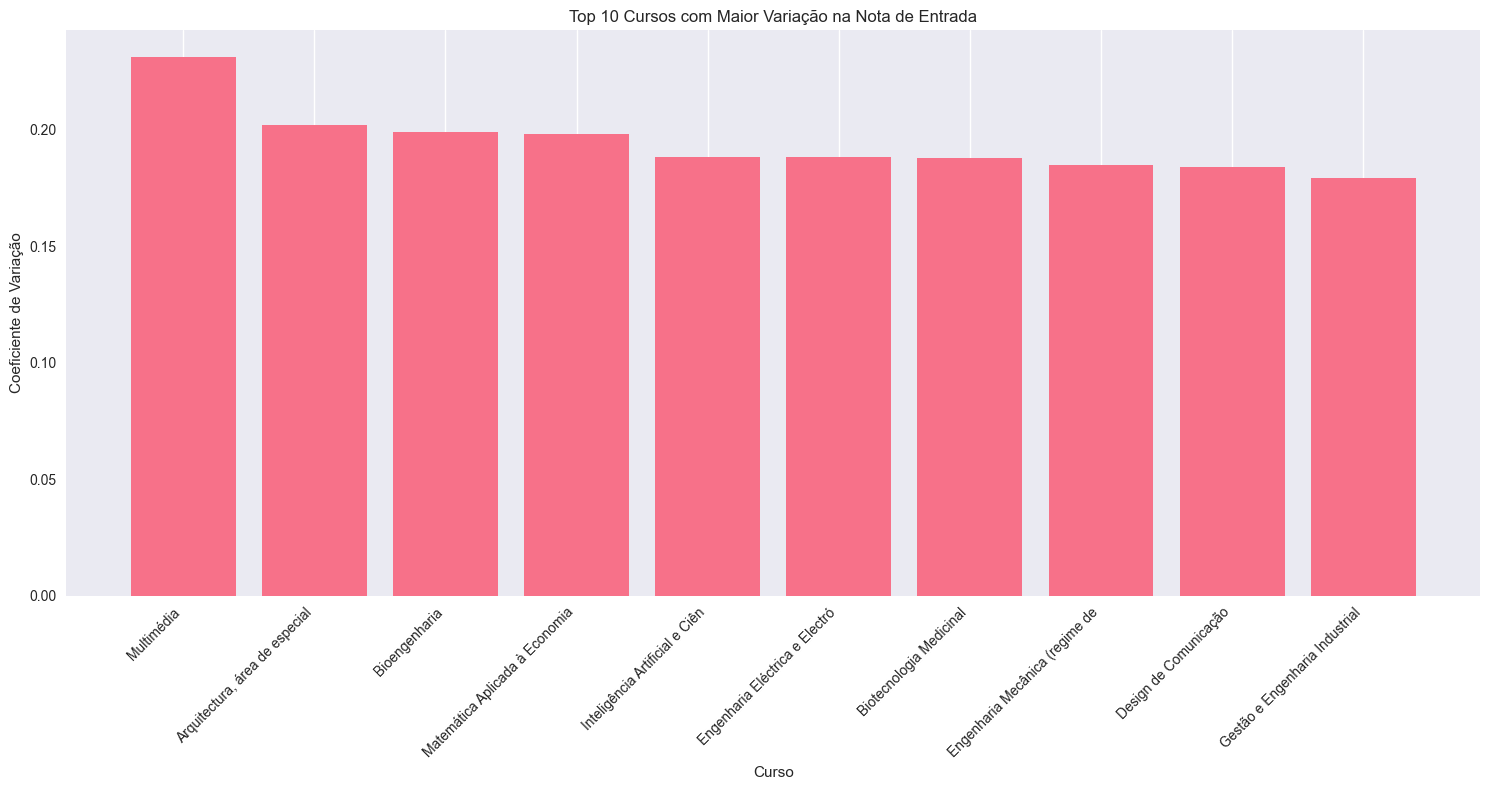

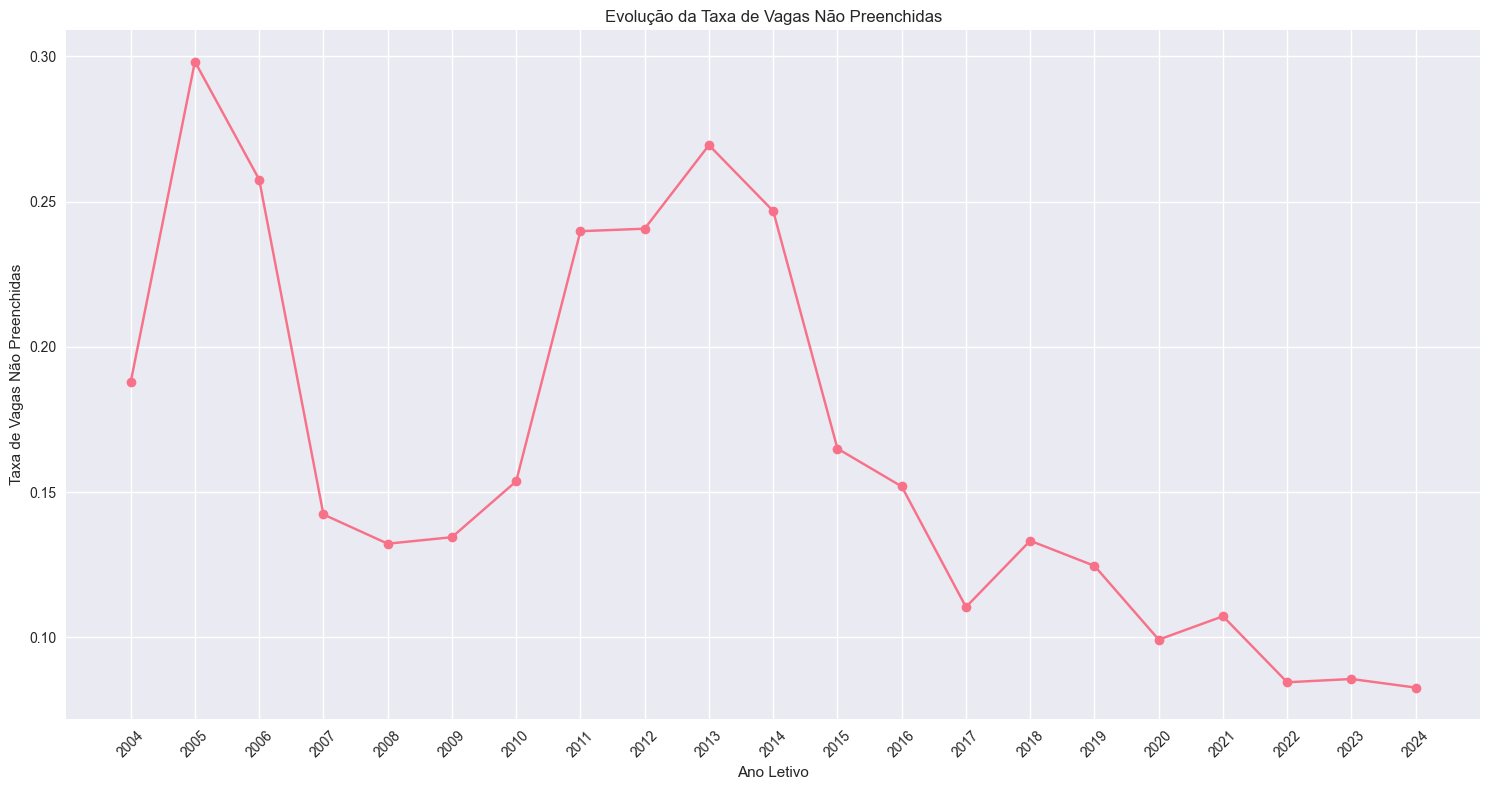

In [9]:
# Análise da variação das notas de corte por curso
# Calcula média, desvio padrão e contagem de anos para cada curso
grade_variation = df_clean.groupby('curso')['nota_ultimo_colocado'].agg(['mean', 'std', 'count'])
# Filtra apenas cursos com pelo menos 3 anos de dados
grade_variation = grade_variation[grade_variation['count'] >= 3]  
# Calcula o coeficiente de variação (desvio padrão / média)
grade_variation['cv'] = grade_variation['std'] / grade_variation['mean']  
# Seleciona os 10 cursos com maior variação
high_variation_courses = grade_variation.sort_values('cv', ascending=False).head(10)

# Gráfico dos cursos com maior variação na nota de corte
plt.figure(figsize=(15,8))
bars = plt.bar(high_variation_courses.index.str[:30], high_variation_courses['cv'])
plt.title('Top 10 Cursos com Maior Variação na Nota de Entrada')
plt.ylabel('Coeficiente de Variação')
plt.xlabel('Curso')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Análise da saturação do mercado ao longo dos anos
# Soma vagas sobrantes e iniciais por ano
market_saturation = df_clean.groupby('ano').agg({
    'vagas_sobrantes': 'sum',
    'vagas_iniciais': 'sum'
})
# Calcula percentual de vagas não preenchidas
market_saturation['taxa_vagas_nao_preenchidas'] = market_saturation['vagas_sobrantes'] / market_saturation['vagas_iniciais']

# Gráfico da evolução das vagas não preenchidas
plt.figure(figsize=(15,8))
plt.plot(market_saturation.index, market_saturation['taxa_vagas_nao_preenchidas'], marker='o')
plt.title('Evolução da Taxa de Vagas Não Preenchidas')
plt.xlabel('Ano Letivo')
plt.ylabel('Taxa de Vagas Não Preenchidas')
plt.grid(True)
plt.xticks(market_saturation.index, rotation=45)
plt.tight_layout()
plt.show()

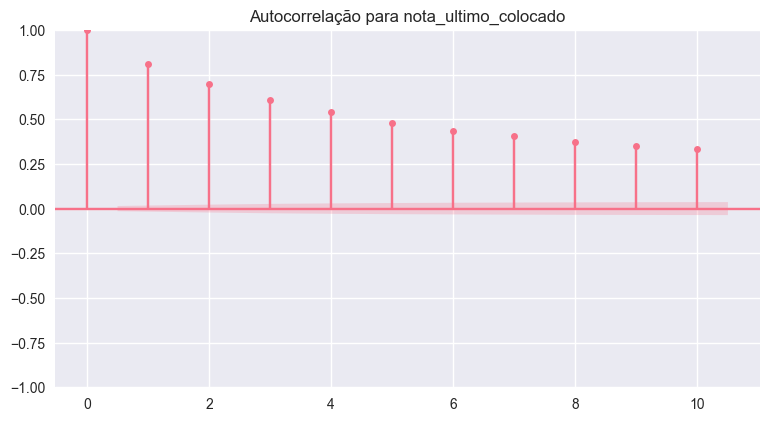

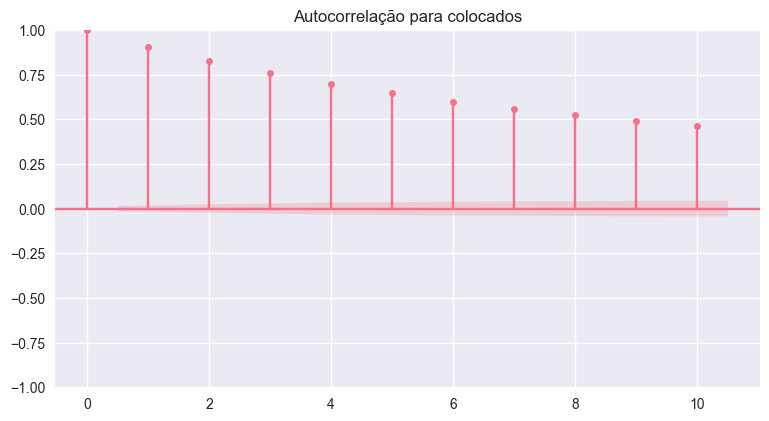

'🔍 Principais Conclusões do Gráfico:\n1. Lag 0 = 1.0\n\nSempre igual a 1 (correlação perfeita consigo mesmo).\nNão é significativo analiticamente — ignoramos.\n\n2. Lag 1 ~ 0.43\n\nO valor da nota_ultimo_colocado deste ano tem correlação positiva moderada com o valor do ano anterior.\nSugere persistência: o desempenho passado influencia o desempenho atual.\n\n3. Decaimento Gradual\n\nACF diminui lentamente ao longo dos lags, mantendo-se estatisticamente significativo até lag ~18-20.\nEste padrão sugere:\nProcesso de memória longa: valores passados permanecem relevantes por muito tempo.\nNão-estacionariedade é provável — a série pode ter tendência ou sazonalidade ao longo do tempo.\n4. Todos os lags > 0 permanecem acima da banda de confiança\n\nSem queda súbita (como em ruído branco), significando que a série temporal não é aleatória.\nA autocorrelação é significativa e útil para previsões.'

In [10]:
# Análise de Correlação Temporal dos Cursos

# Prepara DataFrame para análise da nota do último colocado
# Seleciona apenas as colunas necessárias e ordena por curso e ano
df_test_lag_nota = df_clean[['ano', 'course_id', 'nota_ultimo_colocado']].sort_values(['course_id', 'ano']).copy()

# Gera gráfico de autocorrelação para nota do último colocado
# Mostra como os valores se correlacionam com valores anteriores
plt.figure(figsize=(15, 12))
for i, feature in enumerate(['nota_ultimo_colocado'], 1):
    plt.subplot(3, 2, i)
    plot_acf(df_test_lag_nota[feature], lags=10, ax=plt.gca(), title=f'Autocorrelação para {feature}')
plt.tight_layout()
plt.show()

# Prepara DataFrame para análise do número de colocados
# Seleciona apenas as colunas necessárias e ordena por curso e ano
df_test_lag_colocados = df_clean[['ano', 'course_id', 'colocados']].sort_values(['course_id', 'ano']).copy()

# Gera gráfico de autocorrelação para número de colocados
# Mostra como os valores se correlacionam com valores anteriores
plt.figure(figsize=(15, 12))
for i, feature in enumerate(['colocados'], 1):
    plt.subplot(3, 2, i)
    plot_acf(df_test_lag_colocados[feature], lags=10, ax=plt.gca(), title=f'Autocorrelação para {feature}')
plt.tight_layout()
plt.show()

"""🔍 Principais Conclusões do Gráfico:
1. Lag 0 = 1.0

Sempre igual a 1 (correlação perfeita consigo mesmo).
Não é significativo analiticamente — ignoramos.

2. Lag 1 ~ 0.43

O valor da nota_ultimo_colocado deste ano tem correlação positiva moderada com o valor do ano anterior.
Sugere persistência: o desempenho passado influencia o desempenho atual.

3. Decaimento Gradual

ACF diminui lentamente ao longo dos lags, mantendo-se estatisticamente significativo até lag ~18-20.
Este padrão sugere:
Processo de memória longa: valores passados permanecem relevantes por muito tempo.
Não-estacionariedade é provável — a série pode ter tendência ou sazonalidade ao longo do tempo.
4. Todos os lags > 0 permanecem acima da banda de confiança

Sem queda súbita (como em ruído branco), significando que a série temporal não é aleatória.
A autocorrelação é significativa e útil para previsões."""

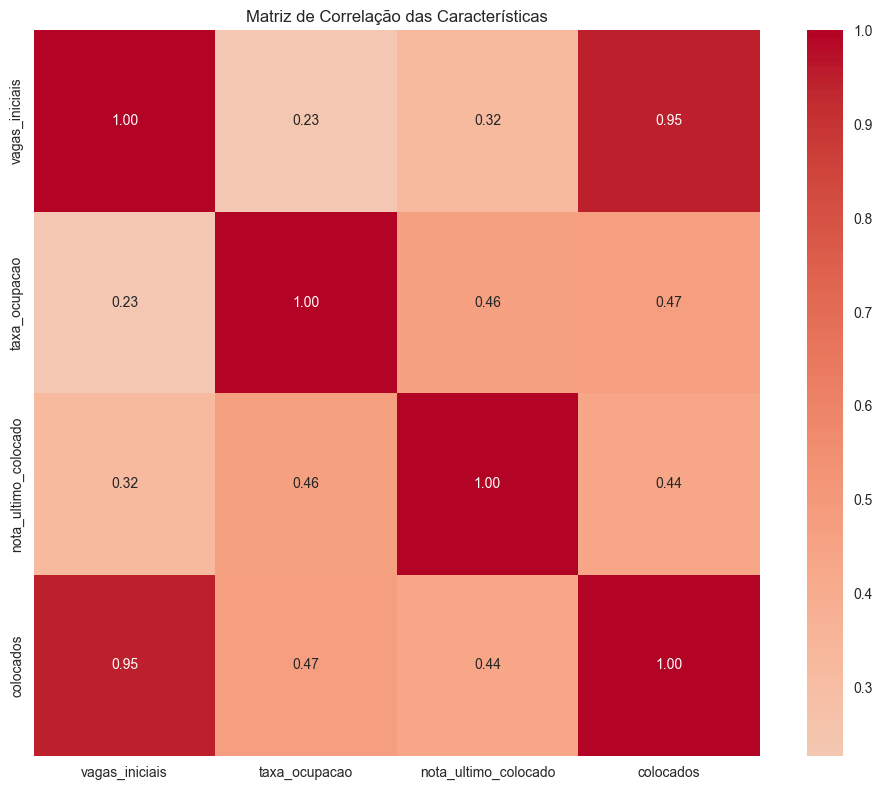

In [11]:
# Análise de correlação das características principais

# Seleciona apenas as colunas numéricas iniciais
initial_columns=df_clean[['vagas_iniciais', 'taxa_ocupacao', 'nota_ultimo_colocado', 'colocados']]

# Cria matriz de correlação entre as variáveis
correlation_matrix = initial_columns.corr()

# Cria um mapa de calor para visualizar as correlações
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,  # Mostra os valores das correlações
            cmap='coolwarm',  # Esquema de cores
            center=0,  # Centraliza as cores no valor 0
            fmt='.2f',  # Formata valores com 2 casas decimais
            square=True)  # Deixa o gráfico quadrado

plt.title('Matriz de Correlação das Características')
plt.tight_layout()  # Ajusta o layout para não cortar as legendas
plt.show()

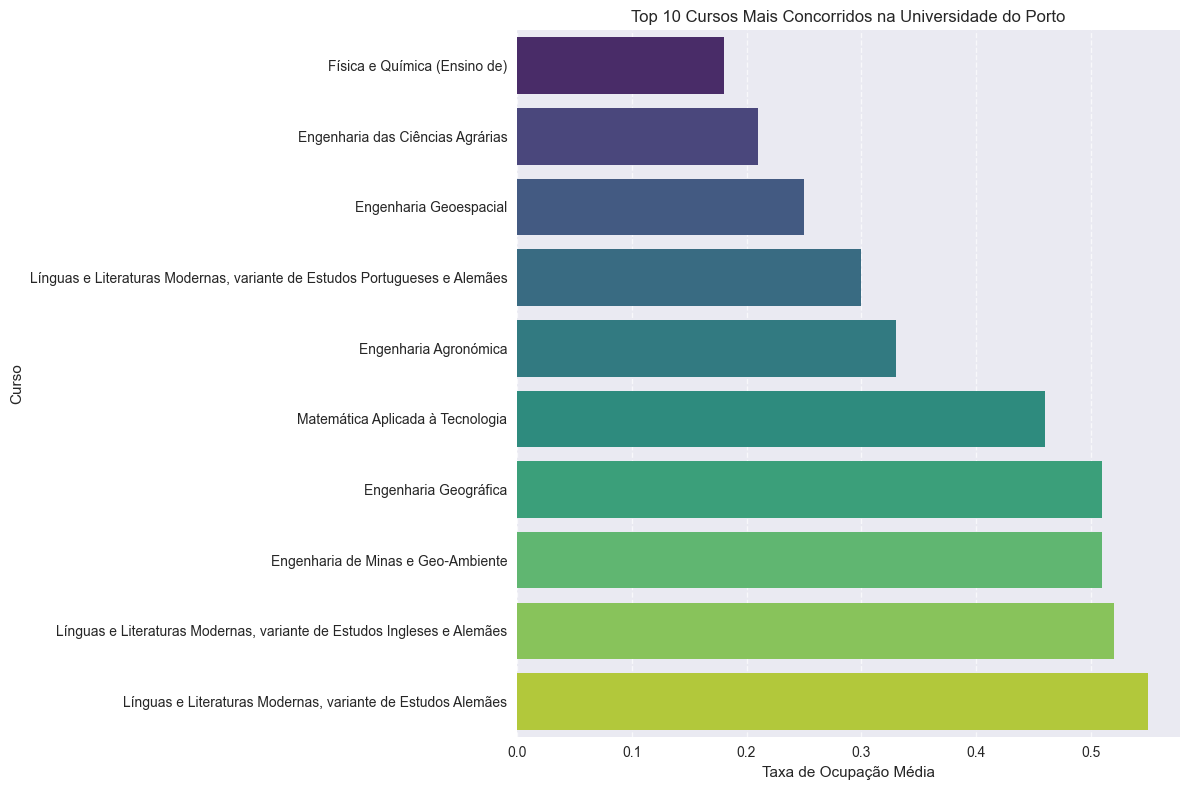

In [14]:
# Cursos mais concorridos na universidade do porto 
# Filtra os dados para a Universidade do Porto
df_up = df_clean[df_clean['nome_universidade'] == 'Universidade do Porto']
# Agrupa por curso e calcula a taxa de ocupação média
up_course_competition = df_up.groupby('curso').agg({    
    'vagas_iniciais': 'sum',
    'colocados': 'sum',
    'taxa_ocupacao': 'mean',
    'nota_ultimo_colocado': 'mean'
}).round(2)
# Ordena por taxa de ocupação e seleciona os 10 cursos mais concorridos
top_up_courses = up_course_competition.sort_values('taxa_ocupacao', ascending=True).head(10)
# Cria gráfico de barras para os cursos mais concorridos
plt.figure(figsize=(12, 8))
sns.barplot(x=top_up_courses['taxa_ocupacao'], 
            y=top_up_courses.index, 
            palette='viridis', 
            orient='h') 
plt.title('Top 10 Cursos Mais Concorridos na Universidade do Porto')
plt.xlabel('Taxa de Ocupação Média')    
plt.ylabel('Curso')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# 3. Feature engineering 

In [9]:
# Cria um novo dataframe com as colunas relevantes para análise
df_feature_eng=df_clean[['ano','course_id','codigo_instituicao', 'instituicao', 'codigo_curso', 'curso','vagas_iniciais','taxa_ocupacao', 'nota_ultimo_colocado', 'colocados']].copy()

# Calcula a média cumulativa das notas de corte por curso ao longo dos anos anteriores
# Usa shift(1) para excluir o ano atual e expanding() para calcular a média móvel
df_feature_eng[f'media_curso_cumulativa'] = (
    df_feature_eng
    .groupby('course_id')['nota_ultimo_colocado']
    .transform(lambda x: x.shift(1).expanding(min_periods=1).mean())
).round(1)

# Calcula a média cumulativa das notas de corte por instituição ao longo dos anos anteriores
# Mesmo processo: exclui ano atual e calcula média móvel dos anos anteriores
df_feature_eng[f'media_inst_cumulativa'] = (
    df_feature_eng
    .groupby('codigo_instituicao')['nota_ultimo_colocado']
    .transform(lambda x: x.shift(1).expanding(min_periods=1).mean())
).round(1)

# Calcula a média móvel da nota do último colocado nos últimos n anos para cada curso
for n in range(1, 5):
    df_feature_eng[f'nota_ultimo_colocado_curso_{n}_anos_anteriores'] = (
        df_feature_eng
        .groupby('course_id')['nota_ultimo_colocado']
        .transform(lambda x: x.shift(1).rolling(window=n, min_periods=n).mean().round(1))
    )

# Calcula o crescimento médio anual (em percentagem) da nota do último colocado nos últimos n anos
for n in range(1, 5):
    df_feature_eng[f'crescimento_medio_anual_percentual_nota_ultimo_colocado_{n}_anos'] = (
        df_feature_eng
        .groupby('course_id')['nota_ultimo_colocado']
        .transform(lambda x: (((x - x.shift(n)) / x.shift(n)) / n * 100).round(2))
    )

# Calcula a média móvel da taxa de ocupação nos últimos n anos para cada curso
for n in range(1, 5):
    df_feature_eng[f'taxa_ocupacao_curso_{n}_anos_anteriores'] = (
        df_feature_eng
        .groupby('course_id')['taxa_ocupacao']
        .transform(lambda x: x.shift(1).rolling(window=n, min_periods=n).mean().round(2))
    )

# Calcula a média móvel do número de colocados nos últimos n anos para cada curso
for n in range(1, 4):
    df_feature_eng[f'numero_colocados_curso_{n}_anos_anteriores'] = (
        df_feature_eng
        .groupby('course_id')['colocados']
        .transform(lambda x: x.shift(1).rolling(window=n, min_periods=n).mean().round(0))
    )

# Calcula a taxa de crescimento do número de colocados evitando divisão por zero
# Para 2 anos
df_feature_eng['crescimento_medio_anual_numero_colocados_2_anos'] = (
    df_feature_eng.apply(lambda x:
        0 if x['numero_colocados_curso_2_anos_anteriores'] == 0
        else ((x['numero_colocados_curso_1_anos_anteriores'] - x['numero_colocados_curso_2_anos_anteriores']) /
              x['numero_colocados_curso_2_anos_anteriores'] / 1),
        axis=1)
).fillna(0).round(2)

# Para 3 anos
df_feature_eng['crescimento_medio_anual_numero_colocados_3_anos'] = (
    df_feature_eng.apply(lambda x:
        0 if x['numero_colocados_curso_3_anos_anteriores'] == 0
        else ((x['numero_colocados_curso_1_anos_anteriores'] - x['numero_colocados_curso_3_anos_anteriores']) /
              x['numero_colocados_curso_3_anos_anteriores'] / 2),
        axis=1)
).fillna(0).round(2)

# Remove linhas com valores nulos
df_feature_eng.dropna(inplace=True)

### Model Training and Prediction

In [10]:
### Vamos usar random forest para prever a nota do último colocado

In [11]:
df_prediction=df_feature_eng.copy()

In [12]:
# Preparar dataset
df = df_prediction[[
 'ano',
 'course_id',

 'nota_ultimo_colocado',

 'media_curso_cumulativa',
 'media_inst_cumulativa',

 'nota_ultimo_colocado_curso_1_anos_anteriores',
 'nota_ultimo_colocado_curso_2_anos_anteriores',
 'nota_ultimo_colocado_curso_3_anos_anteriores',

 #'crescimento_medio_anual_percentual_nota_ultimo_colocado_1_anos', ##não podemos usar para previsão
 'crescimento_medio_anual_percentual_nota_ultimo_colocado_2_anos',
 'crescimento_medio_anual_percentual_nota_ultimo_colocado_3_anos',

 'taxa_ocupacao_curso_1_anos_anteriores',
 'taxa_ocupacao_curso_2_anos_anteriores',
 'taxa_ocupacao_curso_3_anos_anteriores'
 ]].copy()

# Definir variável alvo e características
target = 'nota_ultimo_colocado'
time_col = 'ano'
course_id = 'course_id'

# Lista de características que vamos usar para treinar o modelo (eliminou-se features desnecessárias após features selection)
features = [

    #'media_curso_cumulativa',
    #'media_inst_cumulativa',

    'nota_ultimo_colocado_curso_1_anos_anteriores',
    'nota_ultimo_colocado_curso_2_anos_anteriores',
    'nota_ultimo_colocado_curso_3_anos_anteriores',
    
    #'crescimento_medio_anual_percentual_nota_ultimo_colocado_1_anos',

    'crescimento_medio_anual_percentual_nota_ultimo_colocado_2_anos',
    'crescimento_medio_anual_percentual_nota_ultimo_colocado_3_anos',

    #'taxa_ocupacao_curso_1_anos_anteriores',
    #'taxa_ocupacao_curso_2_anos_anteriores',
    #'taxa_ocupacao_curso_3_anos_anteriores'
]

# Dividir os dados por ano:
# - Treino: anos anteriores a 2023
# - Validação: ano 2023
# - Teste: ano 2024

train = df[df[time_col] < 2023]
valid = df[df[time_col] == 2023]
test = df[df[time_col] == 2024]

# Separar características (X) e variável alvo (y) para cada conjunto
X_train, y_train = train[features], train[target]
X_valid, y_valid = valid[features], valid[target]
X_test, y_test = test[features], test[target]

In [13]:
#Pesquisa em grade para floresta aleatória (random forest)

param_grid = {
    'n_estimators': [30, 50, 100, 200],      #número de árvores
    'max_depth': [4, 6, 8, 10, 12, 15],      #profundidade máxima das árvores
    'min_samples_split': [5, 10, 20],        #número mínimo de amostras para dividir um nó
    'min_samples_leaf': [2, 5, 10]           #número mínimo de amostras em cada folha
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),   #modelo base com semente aleatória fixa
    param_grid,                               #grade de parâmetros a testar
    cv=TimeSeriesSplit(n_splits=3),          #validação cruzada com séries temporais
    scoring='neg_mean_absolute_error',        #métrica de avaliação: erro absoluto médio
    n_jobs=-1                                #usar todos os núcleos do processador
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_     #seleciona o melhor modelo encontrado

In [14]:
# Modelo Random Forest com os parametros otimizados
model_nota_ultimo_colocado = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, min_samples_split=5, min_samples_leaf=2)
model_nota_ultimo_colocado.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,15
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Importância das Features (Top 10):
                                             feature  importance_mean  \
1       nota_ultimo_colocado_curso_2_anos_anteriores         9.382269   
0       nota_ultimo_colocado_curso_1_anos_anteriores         7.154148   
3  crescimento_medio_anual_percentual_nota_ultimo...         6.962750   
2       nota_ultimo_colocado_curso_3_anos_anteriores         2.581953   
4  crescimento_medio_anual_percentual_nota_ultimo...         0.820492   

   importance_std  
1        0.221474  
0        0.199406  
3        0.150972  
2        0.052633  
4        0.034675  


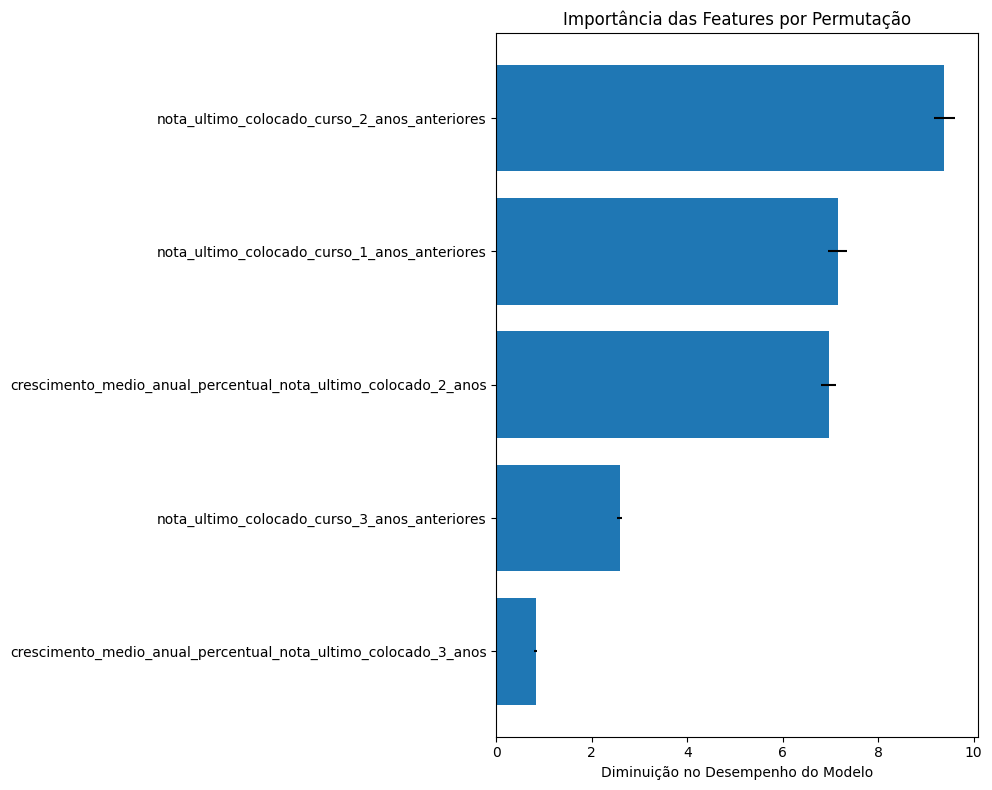

In [15]:

# Calcula a importância das features através de permutação no conjunto de validação
# Isto embaralha cada feature 10 vezes para ver o impacto no erro do modelo

perm_importance = permutation_importance(
    model_nota_ultimo_colocado, X_valid, y_valid, 
    n_repeats=10,  # Número de vezes que cada feature é embaralhada
    random_state=42,
    scoring='neg_mean_absolute_error'
)

# Cria um DataFrame com os resultados da importância das features
perm_importance_df = pd.DataFrame({
    'feature': X_valid.columns,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values('importance_mean', ascending=False)

print("Importância das Features (Top 10):")
print(perm_importance_df.head(10))

# Cria um gráfico de barras horizontais mostrando a importância das 15 principais features
plt.figure(figsize=(10, 8))
top_features = perm_importance_df.head(15)
plt.barh(top_features['feature'], top_features['importance_mean'], 
         xerr=top_features['importance_std'])
plt.title('Importância das Features por Permutação')
plt.xlabel('Diminuição no Desempenho do Modelo')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [16]:
# Avaliar o modelo nos dados de 2023
y_pred_2023 = model_nota_ultimo_colocado.predict(X_valid)

# Calcular métricas de erro para 2023
mae_2023 = mean_absolute_error(y_valid, y_pred_2023)
mse_2023 = mean_squared_error(y_valid, y_pred_2023)
rmse_2023 = np.sqrt(mse_2023)
r2_2023 = r2_score(y_valid, y_pred_2023)

# Calcular R² ajustado para 2023
n = X_valid.shape[0]  # número de amostras
k = X_valid.shape[1]  # número de características
adjusted_r2_2023 = 1 - (1 - r2_2023) * (n - 1) / (n - k - 1)

# Mostrar resultados de 2023
print(f"Erro Médio Absoluto (2023): {mae_2023:.2f}")
print(f"Erro Quadrático Médio (2023): {mse_2023:.2f}")
print(f"Raiz do Erro Quadrático Médio (2023): {rmse_2023:.2f}")
print(f"R² (2023): {r2_2023:.2f}")
print(f"R² Ajustado (2023): {adjusted_r2_2023:.2f}")

# Fazer previsões para 2024 usando todas as árvores do modelo
all_tree_preds_nota = np.array([tree.predict(X_test.values) for tree in model_nota_ultimo_colocado.estimators_])

# Calcular a média das previsões
y_pred_2024 = np.mean(all_tree_preds_nota, axis=0).round(1)

# Calcular intervalo de confiança de 95%
lower_bounds = np.percentile(all_tree_preds_nota, 0.5, axis=0).round(1)
upper_bounds = np.percentile(all_tree_preds_nota, 99.5, axis=0).round(1)

# Criar DataFrame com as previsões e características originais
predictions_2024 = test.copy()
predictions_2024['nota_ultimo_colocado_prevista'] = y_pred_2024
predictions_2024['nota_ultimo_colocado_real'] = y_test.values
predictions_2024['erro'] = predictions_2024['nota_ultimo_colocado_prevista'] - predictions_2024['nota_ultimo_colocado_real']

# Adicionar colunas do intervalo de confiança
predictions_2024['lower_95_ci'] = lower_bounds
predictions_2024['upper_95_ci'] = upper_bounds

# Ordenar por erro absoluto
predictions_2024 = predictions_2024.sort_values(by='erro', key=abs)

# Calcular métricas de erro para 2024
mae = mean_absolute_error(predictions_2024['nota_ultimo_colocado_real'], predictions_2024['nota_ultimo_colocado_prevista'])
mse = mean_squared_error(predictions_2024['nota_ultimo_colocado_real'], predictions_2024['nota_ultimo_colocado_prevista'])
rmse = np.sqrt(mse)
r2 = r2_score(predictions_2024['nota_ultimo_colocado_real'], predictions_2024['nota_ultimo_colocado_prevista'])

# Calcular R² ajustado para 2024
n = len(predictions_2024)  # número de observações
p = len(X_test.columns)    # número de características
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Mostrar métricas de 2024
print("\nMétricas das Previsões 2024:")
print(f"Erro Médio Absoluto: {mae:.2f}")
print(f"Erro Quadrático Médio: {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio: {rmse:.2f}")
print(f"R²: {r2:.3f}")
print(f"R² Ajustado: {adj_r2:.3f}")

Erro Médio Absoluto (2023): 1.37
Erro Quadrático Médio (2023): 4.76
Raiz do Erro Quadrático Médio (2023): 2.18
R² (2023): 0.99
R² Ajustado (2023): 0.98

Métricas das Previsões 2024:
Erro Médio Absoluto: 1.32
Erro Quadrático Médio: 5.88
Raiz do Erro Quadrático Médio: 2.42
R²: 0.983
R² Ajustado: 0.983


In [17]:
# Calcula a percentagem de previsões com erro até 1 ponto decimal
errors_within_1 = (abs(predictions_2024['erro']) == 0).mean() * 100
print(f"Percentagem de previsões para 2024 sem erro: {errors_within_1:.1f}%")

# Calcula a percentagem de previsões com erro até 1 ponto decimal
errors_within_1 = (abs(predictions_2024['erro']) <= 1).mean() * 100
print(f"Percentagem de previsões para 2024 com erro até 1 ponto decimal: {errors_within_1:.1f}%")

# Calcula a percentagem de previsões com erro até 2 pontos decimais
errors_within_2 = (abs(predictions_2024['erro']) <= 2).mean() * 100
print(f"Percentagem de previsões para 2024 com erro até 2 pontos decimais: {errors_within_2:.1f}%")

# Calcula a percentagem de previsões com erro até 3 pontos decimais
errors_within_3 = (abs(predictions_2024['erro']) <= 3).mean() * 100
print(f"Percentagem de previsões para 2024 com erro até 3 pontos decimais: {errors_within_3:.1f}%")

# Calcula a percentagem de previsões com erro até 5 pontos decimais
errors_within_5 = (abs(predictions_2024['erro']) <= 5).mean() * 100
print(f"Percentagem de previsões para 2024 com erro até 5 pontos decimais: {errors_within_5:.1f}%")

# Verifica se os valores reais estão dentro do intervalo de confiança de 99%
within_ci = ((predictions_2024['nota_ultimo_colocado_real'] >= predictions_2024['lower_95_ci']) &
             (predictions_2024['nota_ultimo_colocado_real'] <= predictions_2024['upper_95_ci'])).mean()

print(f"Percentagem de valores reais de 2024 dentro do intervalo de confiança de 99%: {within_ci * 100:.1f}%")

# Mostra os cursos onde o erro de previsão foi superior a 1 ponto
predictions_2024[['ano', 'course_id','nota_ultimo_colocado_prevista','lower_95_ci','upper_95_ci', 'nota_ultimo_colocado_real', 'erro','nota_ultimo_colocado_curso_1_anos_anteriores','taxa_ocupacao_curso_1_anos_anteriores']].loc[predictions_2024['erro']>1]

Percentagem de previsões para 2024 sem erro: 3.6%
Percentagem de previsões para 2024 com erro até 1 ponto decimal: 60.1%
Percentagem de previsões para 2024 com erro até 2 pontos decimais: 83.1%
Percentagem de previsões para 2024 com erro até 3 pontos decimais: 91.3%
Percentagem de previsões para 2024 com erro até 5 pontos decimais: 97.2%
Percentagem de valores reais de 2024 dentro do intervalo de confiança de 99%: 99.5%


,ano,course_id,nota_ultimo_colocado_prevista,lower_95_ci,upper_95_ci,nota_ultimo_colocado_real,erro,nota_ultimo_colocado_curso_1_anos_anteriores,taxa_ocupacao_curso_1_anos_anteriores
17890,2024,9540_3064,120.3,113.4,125.2,119.2,1.1,132.2,0.48
18016,2024,9853_3101,139.5,131.2,149.7,138.4,1.1,136.3,1.00
17545,2024,9089_3182,135.7,130.8,144.8,134.6,1.1,133.4,0.07
18051,2024,9898_3042,136.7,131.3,144.3,135.6,1.1,132.8,1.00
17570,2024,9109_3118,109.1,104.8,113.1,108.0,1.1,110.1,0.29
...,...,...,...,...,...,...,...,...,...
17541,2024,9089_3083,148.4,133.2,158.2,139.8,8.6,159.3,0.35
17568,2024,9107_1307,160.0,123.6,172.3,147.2,12.8,161.6,0.47
17565,2024,9104_3102,158.0,123.6,172.3,144.2,13.8,161.1,0.15
18068,2024,9994_3023,110.5,95.4,124.7,95.0,15.5,138.7,0.10


In [18]:
### regressao linear

### Linear Regression Model Testing
from sklearn.linear_model import LinearRegression

# Treinar modelo Linear Regression
model_nota_ultimo_colocado_2 = LinearRegression()
model_nota_ultimo_colocado_2.fit(X_train, y_train)

# Fazer previsões para 2023
y_pred_2023 = model_nota_ultimo_colocado_2.predict(X_valid)

# Calcular métricas de erro para 2023
mae_2023 = mean_absolute_error(y_valid, y_pred_2023)
mse_2023 = mean_squared_error(y_valid, y_pred_2023)
rmse_2023 = np.sqrt(mse_2023)
r2_2023 = r2_score(y_valid, y_pred_2023)

# Mostrar resultados de 2023
print(f"Erro Médio Absoluto (2023): {mae_2023:.2f}")
print(f"Erro Quadrático Médio (2023): {mse_2023:.2f}")
print(f"Raiz do Erro Quadrático Médio (2023): {rmse_2023:.2f}")
print(f"R² (2023): {r2_2023:.2f}")

# Fazer previsões para 2024
y_pred_2024 = model_nota_ultimo_colocado_2.predict(X_test.values)


# Criar DataFrame com previsões e características originais
predictions_2024 = test.copy()
predictions_2024['nota_prevista'] = y_pred_2024
predictions_2024['nota_real'] = y_test.values
predictions_2024['erro'] = predictions_2024['nota_prevista'] - predictions_2024['nota_real']


# Ordenar por erro absoluto
predictions_2024 = predictions_2024.sort_values(by='erro', key=abs)

# Calcular métricas de erro para 2024
mae = mean_absolute_error(predictions_2024['nota_real'], predictions_2024['nota_prevista'])
mse = mean_squared_error(predictions_2024['nota_real'], predictions_2024['nota_prevista'])
rmse = np.sqrt(mse)
r2 = r2_score(predictions_2024['nota_real'], predictions_2024['nota_prevista'])

# Mostrar métricas de 2024
print("\nMétricas das Previsões 2024:")
print(f"Erro Médio Absoluto: {mae:.2f}")
print(f"Erro Quadrático Médio: {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio: {rmse:.2f}")
print(f"R²: {r2:.3f}")

# Calcular percentagem de previsões com diferentes margens de erro absoluto
# Erro = 0 (previsão exatamente igual ao valor real)

errors_within_0 = (abs(predictions_2024['erro']) == 0).mean() * 100
print(f"Percentagem de previsões exatas (erro = 0): {errors_within_0:.1f}%")

# Erro até 1 colocado de diferença
errors_within_1 = (abs(predictions_2024['erro']) <= 0.1).mean() * 100
print(f"Percentagem de previsões com erro até 1 colocado: {errors_within_1:.1f}%")

# Erro até 2 colocados de diferença
errors_within_2 = (abs(predictions_2024['erro']) <= 0.22).mean() * 100
print(f"Percentagem de previsões com erro até 2 colocados: {errors_within_2:.1f}%")

# Erro até 3 colocados de diferença
errors_within_3 = (abs(predictions_2024['erro']) <= 0.3).mean() * 100
print(f"Percentagem de previsões com erro até 3 colocados: {errors_within_3:.1f}%")

# Erro até 5 colocados de diferença
errors_within_5 = (abs(predictions_2024['erro']) <= 0.5).mean() * 100
print(f"Percentagem de previsões com erro até 5 colocados: {errors_within_5:.1f}%")

Erro Médio Absoluto (2023): 1.01
Erro Quadrático Médio (2023): 2.31
Raiz do Erro Quadrático Médio (2023): 1.52
R² (2023): 0.99

Métricas das Previsões 2024:
Erro Médio Absoluto: 1.06
Erro Quadrático Médio: 2.54
Raiz do Erro Quadrático Médio: 1.59
R²: 0.993
Percentagem de previsões exatas (erro = 0): 0.0%
Percentagem de previsões com erro até 1 colocado: 6.6%
Percentagem de previsões com erro até 2 colocados: 16.7%
Percentagem de previsões com erro até 3 colocados: 22.5%
Percentagem de previsões com erro até 5 colocados: 39.7%


/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [19]:
from statsmodels.tsa.arima.model import ARIMA

df = df[['course_id', 'ano', 'nota_ultimo_colocado']].copy()
df = df.sort_values(['course_id', 'ano'])      

results = []

for cid, grp in df.groupby('course_id'):
    ts = grp.set_index('ano')['nota_ultimo_colocado'].sort_index()

    train = ts[ts.index <= 2023]
    test  = ts[ts.index == 2024]
    
    # 🛡️ Verificações de segurança
    if train.empty or test.empty:
        continue

    if len(train) < 3:
        forecast = pd.Series(train.iloc[-1], index=test.index)
    else:
        try:
            model = ARIMA(train, order=(1, 1, 0)).fit()
            forecast = model.forecast(steps=len(test))
        except:
            # fallback: previsão ingênua
            forecast = pd.Series(train.iloc[-1], index=test.index)

    results.append(
        pd.DataFrame({
            'course_id'     : cid,
            'ano'           : test.index,
            'nota_real'     : test.values,
            'nota_prevista' : forecast.values
        })
    )


pred_df = pd.concat(results, ignore_index=True)
pred_df['erro'] = pred_df['nota_prevista'] - pred_df['nota_real']

mae  = mean_absolute_error(pred_df['nota_real'], pred_df['nota_prevista'])
mse  = mean_squared_error(pred_df['nota_real'], pred_df['nota_prevista'])
rmse = np.sqrt(mse)
r2   = r2_score(pred_df['nota_real'], pred_df['nota_prevista'])

print("---- Métricas Previsão 2024 ----")
print(f"Erro Médio Absoluto:           {mae:.2f}")
print(f"Erro Quadrático Médio:         {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio: {rmse:.2f}")
print(f"R²:                            {r2:.3f}")

thresholds = {
    0.00: "exatas (erro = 0)",
    0.10: "≤ 1 colocado",
    0.22: "≤ 2 colocados",
    0.30: "≤ 3 colocados",
    0.50: "≤ 5 colocados",
}

for lim, label in thresholds.items():
    pct = (abs(pred_df['erro']) <= lim).mean() * 100
    print(f"Percentagem de previsões {label}: {pct:.1f}%")


/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-pa

---- Métricas Previsão 2024 ----
Erro Médio Absoluto:           5.91
Erro Quadrático Médio:         65.21
Raiz do Erro Quadrático Médio: 8.08
R²:                            0.811
Percentagem de previsões exatas (erro = 0): 0.3%
Percentagem de previsões ≤ 1 colocado: 1.7%
Percentagem de previsões ≤ 2 colocados: 3.1%
Percentagem de previsões ≤ 3 colocados: 4.7%
Percentagem de previsões ≤ 5 colocados: 6.9%


/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An 

## numero colocados

In [20]:
# Prepara o dataset com as colunas necessárias
df = df_prediction[[
    'ano',
    'course_id',

    'colocados',

    'vagas_iniciais',

    'media_curso_cumulativa',
    'media_inst_cumulativa',

    'nota_ultimo_colocado_curso_1_anos_anteriores',
    'nota_ultimo_colocado_curso_2_anos_anteriores',
    'nota_ultimo_colocado_curso_3_anos_anteriores',

    'crescimento_medio_anual_percentual_nota_ultimo_colocado_1_anos',
    'crescimento_medio_anual_percentual_nota_ultimo_colocado_2_anos',
    'crescimento_medio_anual_percentual_nota_ultimo_colocado_3_anos',

    'taxa_ocupacao_curso_1_anos_anteriores',
    'taxa_ocupacao_curso_2_anos_anteriores',
    'taxa_ocupacao_curso_3_anos_anteriores',

    'numero_colocados_curso_1_anos_anteriores',
    'numero_colocados_curso_2_anos_anteriores',
    'numero_colocados_curso_3_anos_anteriores',
    
    'crescimento_medio_anual_numero_colocados_2_anos',
    'crescimento_medio_anual_numero_colocados_3_anos'
    ]].copy()

# Codifica o curso como categoria numérica
df['course_id_encoded'] = LabelEncoder().fit_transform(df['course_id'])

# Define a variável alvo e as features para o modelo
target = 'colocados'
time_col = 'ano'
course_id = 'course_id'

# Lista das features que serão usadas no modelo (eliminado as features após feature selection)
features = [
    
    #'course_id_encoded',

    'vagas_iniciais',

    #'media_curso_cumulativa',
    'media_inst_cumulativa',

    #'nota_ultimo_colocado_curso_1_anos_anteriores',
    #'nota_ultimo_colocado_curso_2_anos_anteriores',
    #'nota_ultimo_colocado_curso_3_anos_anteriores',

    'crescimento_medio_anual_percentual_nota_ultimo_colocado_2_anos',
    #'crescimento_medio_anual_percentual_nota_ultimo_colocado_3_anos',

    'taxa_ocupacao_curso_1_anos_anteriores',
    'taxa_ocupacao_curso_2_anos_anteriores',
    'taxa_ocupacao_curso_3_anos_anteriores',

    'numero_colocados_curso_1_anos_anteriores',
    'numero_colocados_curso_2_anos_anteriores',
    'numero_colocados_curso_3_anos_anteriores',
    
    #'crescimento_medio_anual_numero_colocados_2_anos',
    #'crescimento_medio_anual_numero_colocados_3_anos'
]

# Divide os dados por ano: treino (<2023), validação (2023) e teste (2024)
train = df[df[time_col] < 2023]
valid = df[df[time_col] == 2023]
test = df[df[time_col] == 2024]

# Separa features (X) e target (y) para cada conjunto
X_train, y_train = train[features], train[target]
X_valid, y_valid = valid[features], valid[target]
X_test, y_test = test[features], test[target]

In [21]:
# Procura dos melhores parâmetros para o modelo Random Forest
# Define uma grade de parâmetros para testar diferentes combinações
param_grid = {
    'n_estimators': [30, 50, 100],      # Número de árvores na floresta
    'max_depth': [4, 6, 8, 10, 12, 15], # Profundidade máxima de cada árvore
    'min_samples_split': [5, 10, 20],    # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [2, 5, 10]       # Número mínimo de amostras em cada folha
}

# Cria um objeto de busca em grade que vai:
# - Usar validação cruzada temporal (3 divisões)
# - Otimizar para minimizar o erro absoluto médio
# - Usar todos os núcleos do processador (-1)
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=TimeSeriesSplit(n_splits=3),
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

# Treina o modelo com todas as combinações de parâmetros
grid_search.fit(X_train, y_train)
# Obtém o melhor modelo encontrado
best_model = grid_search.best_estimator_
best_model

,n_estimators,100
,criterion,'squared_error'
,max_depth,15
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
# Treinar modelo Random Forest com os parâmetros escolhidos
model_colocados = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, min_samples_split=5, min_samples_leaf=2)
model_colocados.fit(X_train, y_train)

# Fazer previsões para 2023
y_pred_2023_raw = model_colocados.predict(X_valid)

# Limitar previsões ao número de vagas iniciais disponíveis
y_pred_2023 = np.minimum(y_pred_2023_raw, X_valid['vagas_iniciais'].values)

# Calcular métricas de erro para 2023
mae_2023 = mean_absolute_error(y_valid, y_pred_2023)
mse_2023 = mean_squared_error(y_valid, y_pred_2023)
rmse_2023 = np.sqrt(mse_2023)
r2_2023 = r2_score(y_valid, y_pred_2023)

# Calcular R² ajustado para 2023
n = X_valid.shape[0]  # número de amostras
k = X_valid.shape[1]  # número de características
adjusted_r2_2023 = 1 - (1 - r2_2023) * (n - 1) / (n - k - 1)

# Mostrar resultados de 2023
print(f"Erro Médio Absoluto (2023): {mae_2023:.2f}")
print(f"Erro Quadrático Médio (2023): {mse_2023:.2f}")
print(f"Raiz do Erro Quadrático Médio (2023): {rmse_2023:.2f}")
print(f"R² (2023): {r2_2023:.2f}")
print(f"R² Ajustado (2023): {adjusted_r2_2023:.2f}")

# Obter previsões de todas as árvores para calcular intervalo de confiança
all_tree_preds_colocados = np.array([tree.predict(X_test.values) for tree in model_colocados.estimators_])

# Limitar previsões de cada árvore ao número de vagas iniciais
vagas_iniciais_array = X_test['vagas_iniciais'].values
all_tree_preds_colocados = np.minimum(all_tree_preds_colocados, vagas_iniciais_array[np.newaxis, :])

# Calcular média das previsões para 2024
y_pred_2024 = np.mean(all_tree_preds_colocados, axis=0).round(0)

# Calcular intervalo de confiança de 95%
lower_bounds = np.percentile(all_tree_preds_colocados, 0.5, axis=0).round(0)
upper_bounds = np.percentile(all_tree_preds_colocados, 99.5, axis=0).round(0)
# Limitar limite superior ao número de vagas iniciais
upper_bounds = np.minimum(upper_bounds, vagas_iniciais_array)

# Criar DataFrame com previsões e características originais
predictions_2024 = test.copy()
predictions_2024['colocados_prevista'] = y_pred_2024
predictions_2024['colocados_real'] = y_test.values
predictions_2024['erro'] = predictions_2024['colocados_prevista'] - predictions_2024['colocados_real']

# Adicionar colunas do intervalo de confiança
predictions_2024['lower_95_ci'] = lower_bounds
predictions_2024['upper_95_ci'] = upper_bounds

# Ordenar por erro absoluto
predictions_2024 = predictions_2024.sort_values(by='erro', key=abs)

# Calcular métricas de erro para 2024
mae = mean_absolute_error(predictions_2024['colocados_real'], predictions_2024['colocados_prevista'])
mse = mean_squared_error(predictions_2024['colocados_real'], predictions_2024['colocados_prevista'])
rmse = np.sqrt(mse)
r2 = r2_score(predictions_2024['colocados_real'], predictions_2024['colocados_prevista'])

# Calcular R² ajustado para 2024
n = len(predictions_2024)  # número de observações
p = len(X_test.columns)    # número de características
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Mostrar métricas de 2024
print("\nMétricas das Previsões 2024:")
print(f"Erro Médio Absoluto: {mae:.2f}")
print(f"Erro Quadrático Médio: {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio: {rmse:.2f}")
print(f"R²: {r2:.3f}")
print(f"R² Ajustado: {adj_r2:.3f}")

Erro Médio Absoluto (2023): 2.19
Erro Quadrático Médio (2023): 18.98
Raiz do Erro Quadrático Médio (2023): 4.36
R² (2023): 0.99
R² Ajustado (2023): 0.99

Métricas das Previsões 2024:
Erro Médio Absoluto: 2.28
Erro Quadrático Médio: 18.69
Raiz do Erro Quadrático Médio: 4.32
R²: 0.990
R² Ajustado: 0.990


In [23]:
# Calcular percentagem de previsões com diferentes margens de erro absoluto
# Erro = 0 (previsão exatamente igual ao valor real)
errors_within_0 = (abs(predictions_2024['erro']) == 0).mean() * 100
print(f"Percentagem de previsões exatas (erro = 0): {errors_within_0:.1f}%")

# Erro até 1 colocado de diferença
errors_within_1 = (abs(predictions_2024['erro']) <= 1).mean() * 100
print(f"Percentagem de previsões com erro até 1 colocado: {errors_within_1:.1f}%")

# Erro até 2 colocados de diferença
errors_within_2 = (abs(predictions_2024['erro']) <= 2).mean() * 100
print(f"Percentagem de previsões com erro até 2 colocados: {errors_within_2:.1f}%")

# Erro até 3 colocados de diferença
errors_within_3 = (abs(predictions_2024['erro']) <= 3).mean() * 100
print(f"Percentagem de previsões com erro até 3 colocados: {errors_within_3:.1f}%")

# Erro até 5 colocados de diferença
errors_within_5 = (abs(predictions_2024['erro']) <= 5).mean() * 100
print(f"Percentagem de previsões com erro até 5 colocados: {errors_within_5:.1f}%")

# Verificar quantos valores reais estão dentro do intervalo de confiança previsto
within_ci = ((predictions_2024['colocados_real'] >= predictions_2024['lower_95_ci']) &
             (predictions_2024['colocados_real'] <= predictions_2024['upper_95_ci'])).mean()

print(f"\nPercentagem de valores reais dentro do intervalo de confiança de 99%: {within_ci * 100:.1f}%")

# Mostrar casos onde o erro foi maior que 1 colocado
# Ajuda a entender onde o modelo teve pior desempenho
print("\nCasos com erro maior que 1 colocado:")
predictions_2024[['ano', 'course_id','vagas_iniciais', 'colocados_prevista','lower_95_ci',
                  'upper_95_ci', 'colocados_real', 'erro',
                  'numero_colocados_curso_1_anos_anteriores', 'crescimento_medio_anual_numero_colocados_2_anos']].loc[predictions_2024['erro']>1]


Percentagem de previsões exatas (erro = 0): 35.2%
Percentagem de previsões com erro até 1 colocado: 64.2%
Percentagem de previsões com erro até 2 colocados: 75.3%
Percentagem de previsões com erro até 3 colocados: 81.2%
Percentagem de previsões com erro até 5 colocados: 87.0%

Percentagem de valores reais dentro do intervalo de confiança de 99%: 95.8%

Casos com erro maior que 1 colocado:


,ano,course_id,vagas_iniciais,colocados_prevista,lower_95_ci,upper_95_ci,colocados_real,erro,numero_colocados_curso_1_anos_anteriores,crescimento_medio_anual_numero_colocados_2_anos
18134,2024,L101_7040,25.0,14.0,4.0,21.0,12.0,2.0,11.0,-0.39
18169,2024,L193_1203,20.0,15.0,6.0,20.0,13.0,2.0,12.0,-0.14
18123,2024,L088_3042,25.0,5.0,2.0,16.0,3.0,2.0,5.0,0.25
17923,2024,9648_3102,14.0,5.0,2.0,11.0,3.0,2.0,2.0,0.00
18002,2024,9848_3105,25.0,16.0,12.0,23.0,14.0,2.0,15.0,-0.25
...,...,...,...,...,...,...,...,...,...,...
17406,2024,9003_3141,58.0,32.0,4.0,58.0,14.0,18.0,21.0,0.00
18078,2024,L003_3141,37.0,25.0,19.0,35.0,7.0,18.0,23.0,-0.23
17605,2024,9119_3242,65.0,47.0,21.0,65.0,28.0,19.0,49.0,0.02
17357,2024,8309_3045,56.0,50.0,20.0,56.0,30.0,20.0,49.0,0.22


In [24]:
### os erros estão a surgir de uma previsão superior ao numero de vagas iniciais

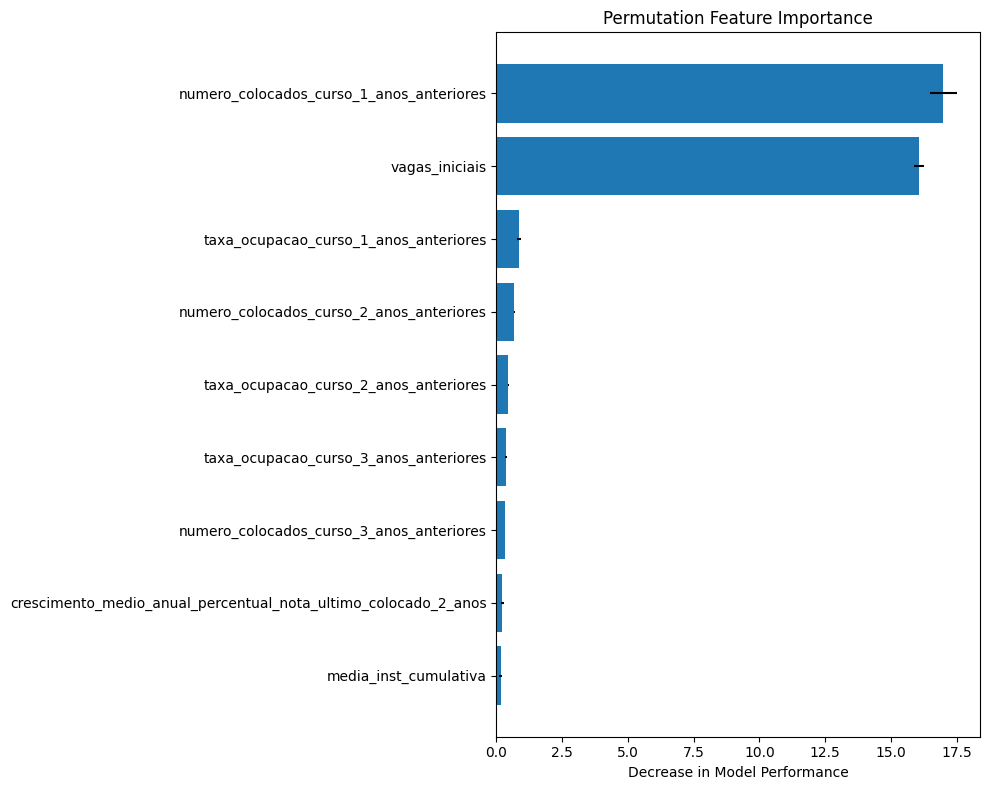

In [25]:
# Calculate permutation importance on validation set
perm_importance = permutation_importance(
    model_colocados, X_valid, y_valid, 
    n_repeats=10,  # Number of times to shuffle each feature
    random_state=42,
    scoring='neg_mean_absolute_error'
)

# Create DataFrame
perm_importance_df = pd.DataFrame({
    'feature': X_valid.columns,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values('importance_mean', ascending=False)

# Plot with error bars
plt.figure(figsize=(10, 8))
top_features = perm_importance_df.head(15)
plt.barh(top_features['feature'], top_features['importance_mean'], 
         xerr=top_features['importance_std'])
plt.title('Permutation Feature Importance')
plt.xlabel('Decrease in Model Performance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [26]:
### Linear Regression Model Testing
from sklearn.linear_model import LinearRegression

# Treinar modelo Linear Regression
model_colocados_2 = LinearRegression()
model_colocados_2.fit(X_train, y_train)

# Fazer previsões para 2023
y_pred_2023 = model_colocados_2.predict(X_valid)

# Calcular métricas de erro para 2023
mae_2023 = mean_absolute_error(y_valid, y_pred_2023)
mse_2023 = mean_squared_error(y_valid, y_pred_2023)
rmse_2023 = np.sqrt(mse_2023)
r2_2023 = r2_score(y_valid, y_pred_2023)

# Mostrar resultados de 2023
print(f"Erro Médio Absoluto (2023): {mae_2023:.2f}")
print(f"Erro Quadrático Médio (2023): {mse_2023:.2f}")
print(f"Raiz do Erro Quadrático Médio (2023): {rmse_2023:.2f}")
print(f"R² (2023): {r2_2023:.2f}")

# Fazer previsões para 2024
y_pred_2024 = model_colocados_2.predict(X_test.values)


# Criar DataFrame com previsões e características originais
predictions_2024 = test.copy()
predictions_2024['colocados_prevista'] = y_pred_2024
predictions_2024['colocados_real'] = y_test.values
predictions_2024['erro'] = predictions_2024['colocados_prevista'] - predictions_2024['colocados_real']


# Ordenar por erro absoluto
predictions_2024 = predictions_2024.sort_values(by='erro', key=abs)

# Calcular métricas de erro para 2024
mae = mean_absolute_error(predictions_2024['colocados_real'], predictions_2024['colocados_prevista'])
mse = mean_squared_error(predictions_2024['colocados_real'], predictions_2024['colocados_prevista'])
rmse = np.sqrt(mse)
r2 = r2_score(predictions_2024['colocados_real'], predictions_2024['colocados_prevista'])

# Mostrar métricas de 2024
print("\nMétricas das Previsões 2024:")
print(f"Erro Médio Absoluto: {mae:.2f}")
print(f"Erro Quadrático Médio: {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio: {rmse:.2f}")
print(f"R²: {r2:.3f}")

# Calcular percentagem de previsões com diferentes margens de erro absoluto
# Erro = 0 (previsão exatamente igual ao valor real)

errors_within_0 = (abs(predictions_2024['erro']) == 0).mean() * 100
print(f"Percentagem de previsões exatas (erro = 0): {errors_within_0:.1f}%")

# Erro até 1 colocado de diferença
errors_within_1 = (abs(predictions_2024['erro']) <= 1).mean() * 100
print(f"Percentagem de previsões com erro até 1 colocado: {errors_within_1:.1f}%")

# Erro até 2 colocados de diferença
errors_within_2 = (abs(predictions_2024['erro']) <= 2).mean() * 100
print(f"Percentagem de previsões com erro até 2 colocados: {errors_within_2:.1f}%")

# Erro até 3 colocados de diferença
errors_within_3 = (abs(predictions_2024['erro']) <= 3).mean() * 100
print(f"Percentagem de previsões com erro até 3 colocados: {errors_within_3:.1f}%")

# Erro até 5 colocados de diferença
errors_within_5 = (abs(predictions_2024['erro']) <= 5).mean() * 100
print(f"Percentagem de previsões com erro até 5 colocados: {errors_within_5:.1f}%")

Erro Médio Absoluto (2023): 2.95
Erro Quadrático Médio (2023): 23.24
Raiz do Erro Quadrático Médio (2023): 4.82
R² (2023): 0.99

Métricas das Previsões 2024:
Erro Médio Absoluto: 2.95
Erro Quadrático Médio: 23.35
Raiz do Erro Quadrático Médio: 4.83
R²: 0.987
Percentagem de previsões exatas (erro = 0): 0.0%
Percentagem de previsões com erro até 1 colocado: 30.8%
Percentagem de previsões com erro até 2 colocados: 54.2%
Percentagem de previsões com erro até 3 colocados: 71.6%
Percentagem de previsões com erro até 5 colocados: 85.4%


/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
from statsmodels.tsa.arima.model import ARIMA

df_prediction = df[['course_id', 'ano', 'colocados']].copy()
df = df.sort_values(['course_id', 'ano'])      

results = []

for cid, grp in df.groupby('course_id'):
    ts = grp.set_index('ano')['colocados'].sort_index()

    train = ts[ts.index <= 2023]
    test  = ts[ts.index == 2024]
    
    # 🛡️ Verificações de segurança
    if train.empty or test.empty:
        continue

    # Escolha do modelo
    if len(train) < 3:
        forecast = pd.Series(train.iloc[-1], index=test.index)
    else:
        try:
            model = ARIMA(train, order=(1, 1, 0)).fit()
            forecast = model.forecast(steps=len(test))
        except:
            # fallback: previsão ingênua
            forecast = pd.Series(train.iloc[-1], index=test.index)

    results.append(
        pd.DataFrame({
            'course_id'     : cid,
            'ano'           : test.index,
            'colocados_real'     : test.values,
            'colocados_prevista' : forecast.values
        })
    )


pred_df = pd.concat(results, ignore_index=True)
pred_df['erro'] = pred_df['colocados_prevista'] - pred_df['colocados_real']

mae  = mean_absolute_error(pred_df['colocados_real'], pred_df['colocados_prevista'])
mse  = mean_squared_error(pred_df['colocados_real'], pred_df['colocados_prevista'])
rmse = np.sqrt(mse)
r2   = r2_score(pred_df['colocados_real'], pred_df['colocados_prevista'])

print("---- Métricas Previsão 2024 ----")
print(f"Erro Médio Absoluto:           {mae:.2f}")
print(f"Erro Quadrático Médio:         {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio: {rmse:.2f}")
print(f"R²:                            {r2:.3f}")

thresholds = {
    0: "exatas (erro = 0)",
    1: "≤ 1 colocado",
    2: "≤ 2 colocados",
    3: "≤ 3 colocados",
    5: "≤ 5 colocados",
}

for lim, label in thresholds.items():
    pct = (abs(pred_df['erro']) <= lim).mean() * 100
    print(f"Percentagem de previsões {label}: {pct:.1f}%")

/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-pa

---- Métricas Previsão 2024 ----
Erro Médio Absoluto:           2.58
Erro Quadrático Médio:         29.12
Raiz do Erro Quadrático Médio: 5.40
R²:                            0.984
Percentagem de previsões exatas (erro = 0): 25.7%
Percentagem de previsões ≤ 1 colocado: 58.3%
Percentagem de previsões ≤ 2 colocados: 68.6%
Percentagem de previsões ≤ 3 colocados: 76.0%
Percentagem de previsões ≤ 5 colocados: 84.4%


/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cann

### generate predictions for 2025

In [28]:


# Get data from last 3 years for calculating trends
df_extra = df_feature_eng[df_feature_eng['ano'].isin([2022,2023,2024])].copy()

# Create 2025 dataframe based on 2024 data
df25 = df_feature_eng[df_feature_eng['ano']==2024].copy()


renamed_columns = {
    'ano': 'ano',
    'course_id': 'course_id', 
    'codigo_instituicao': 'codigo_instituicao',
    'instituicao': 'instituicao',
    'codigo_curso': 'codigo_curso',
    'curso': 'curso',
    'media_curso_cumulativa': 'media_curso_cumulativa',
    'media_inst_cumulativa': 'media_inst_cumulativa',
    'vagas_iniciais': 'vagas_iniciais',
    'taxa_ocupacao': 'taxa_ocupacao_curso_1_anos_anteriores',
    'nota_ultimo_colocado': 'nota_ultimo_colocado_curso_1_anos_anteriores',
    'colocados': 'numero_colocados_curso_1_anos_anteriores',
    'nota_ultimo_colocado_curso_1_anos_anteriores': 'nota_ultimo_colocado_curso_2_anos_anteriores',
    'nota_ultimo_colocado_curso_2_anos_anteriores': 'nota_ultimo_colocado_curso_3_anos_anteriores',
    'taxa_ocupacao_curso_1_anos_anteriores': 'taxa_ocupacao_curso_2_anos_anteriores', 
    'taxa_ocupacao_curso_2_anos_anteriores': 'taxa_ocupacao_curso_3_anos_anteriores',
    'numero_colocados_curso_1_anos_anteriores': 'numero_colocados_curso_2_anos_anteriores',
    'numero_colocados_curso_2_anos_anteriores': 'numero_colocados_curso_3_anos_anteriores'
}

# Keep only columns that are keys in renamed_columns
df25 = df25[list(renamed_columns.keys())]

df25 = df25.rename(columns=renamed_columns)

# Set year to 2025
df25['ano'] = 2025

df25['crescimento_medio_anual_percentual_nota_ultimo_colocado_2_anos'] = ((df25['nota_ultimo_colocado_curso_1_anos_anteriores'] / df25['nota_ultimo_colocado_curso_2_anos_anteriores']) - 1).round(2)
df25['crescimento_medio_anual_percentual_nota_ultimo_colocado_3_anos'] = (((df25['nota_ultimo_colocado_curso_1_anos_anteriores'] / df25['nota_ultimo_colocado_curso_3_anos_anteriores']) - 1)/2).round(2)

df25


,ano,course_id,codigo_instituicao,instituicao,codigo_curso,curso,media_curso_cumulativa,media_inst_cumulativa,vagas_iniciais,taxa_ocupacao_curso_1_anos_anteriores,nota_ultimo_colocado_curso_1_anos_anteriores,numero_colocados_curso_1_anos_anteriores,nota_ultimo_colocado_curso_2_anos_anteriores,nota_ultimo_colocado_curso_3_anos_anteriores,taxa_ocupacao_curso_2_anos_anteriores,taxa_ocupacao_curso_3_anos_anteriores,numero_colocados_curso_2_anos_anteriores,numero_colocados_curso_3_anos_anteriores,crescimento_medio_anual_percentual_nota_ultimo_colocado_2_anos,crescimento_medio_anual_percentual_nota_ultimo_colocado_3_anos
17304,2025,8002_3131,3131,Instituto Politécnico do Porto - Escola Superi...,8002,Línguas e Culturas Estrangeiras,142.2,131.3,55.0,1.000000,161.7,55.0,164.6,164.6,1.0,1.00,55.0,54.0,-0.02,-0.01
17305,2025,8005_3011,3011,Universidade de Aveiro - Instituto Superior de...,8005,Marketing (regime pós-laboral),122.9,126.7,20.0,1.000000,139.4,20.0,145.9,143.5,1.0,1.00,20.0,20.0,-0.04,-0.01
17306,2025,8005_3134,3134,Instituto Politécnico do Porto - Instituto Sup...,8005,Marketing (regime pós-laboral),134.2,136.8,27.0,1.000000,152.4,27.0,155.8,152.2,1.0,1.00,27.0,28.0,-0.02,0.00
17307,2025,8014_1516,1516,Universidade de Lisboa - Instituto Superior de...,8014,Serviço Social (regime pós-laboral),130.4,138.9,32.0,1.000000,136.0,32.0,137.5,139.5,1.0,1.00,32.0,32.0,-0.01,-0.01
17308,2025,8014_3101,3101,Instituto Politécnico de Leiria - Escola Super...,8014,Serviço Social (regime pós-laboral),112.3,120.4,20.0,0.900000,117.2,18.0,122.6,122.4,1.0,1.00,20.0,20.0,-0.04,-0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18167,2025,L189_6800,6800,ISCTE - Instituto Universitário de Lisboa,L189,Ciência de Dados (regime pós-laboral),143.0,142.7,30.0,1.000000,148.6,30.0,146.6,149.0,1.0,1.00,30.0,30.0,0.01,-0.00
18168,2025,L192_0501,501,Universidade de Coimbra - Faculdade de Ciência...,L192,Engenharia e Ciência de Dados,133.8,131.3,40.0,1.000000,146.0,40.0,148.5,146.8,1.0,1.00,40.0,40.0,-0.02,-0.00
18169,2025,L193_1203,1203,Universidade de Trás-os-Montes e Alto Douro - ...,L193,Matemática Aplicada e Ciência de Dados,116.3,125.1,20.0,0.650000,117.0,13.0,125.6,118.4,0.6,0.72,12.0,14.0,-0.07,-0.01
18170,2025,L194_3012,3012,Universidade de Aveiro - Escola Superior de Te...,L194,Eletrónica e Mecânica Industrial,135.2,118.7,35.0,1.000000,135.9,35.0,134.8,132.4,1.0,1.00,30.0,32.0,0.01,0.01


In [29]:
# Lista das features que serão usadas no modelo
features_colocados = [
    'vagas_iniciais',
    'media_inst_cumulativa',
    'crescimento_medio_anual_percentual_nota_ultimo_colocado_2_anos',
    'taxa_ocupacao_curso_1_anos_anteriores',
    'taxa_ocupacao_curso_2_anos_anteriores',
    'taxa_ocupacao_curso_3_anos_anteriores',

    'numero_colocados_curso_1_anos_anteriores',
    'numero_colocados_curso_2_anos_anteriores',
    'numero_colocados_curso_3_anos_anteriores',
]

# Preparar dados para previsão 2025
X_2025 = df25[features_colocados].copy()

# Fazer previsões para 2025
y_pred_2025_raw = model_colocados.predict(X_2025)

# Obter previsões de todas as árvores para calcular intervalo de confiança
all_tree_preds_colocados = np.array([tree.predict(X_2025.values) for tree in model_colocados.estimators_])

# Limitar previsões de cada árvore ao número de vagas iniciais
vagas_iniciais_array = X_2025['vagas_iniciais'].values
all_tree_preds_colocados = np.minimum(all_tree_preds_colocados, vagas_iniciais_array[np.newaxis, :])


# Calcular média das previsões para 2025
y_pred_2025_colocados = np.mean(all_tree_preds_colocados, axis=0).round(0)

# Calcular intervalo de confiança de 95%
lower_bounds_colocados = np.percentile(all_tree_preds_colocados, 0.5, axis=0).round(0)
upper_bounds_colocados = np.percentile(all_tree_preds_colocados, 99.5, axis=0).round(0)

# Limitar limite superior ao número de vagas iniciais
upper_bounds_colocados = np.minimum(upper_bounds_colocados, vagas_iniciais_array)


In [30]:
################# nota ultimo colocado #####################

# Lista das features que serão usadas no modelo
features_nota_ultimo_colocado = [

    'nota_ultimo_colocado_curso_1_anos_anteriores',
    'nota_ultimo_colocado_curso_2_anos_anteriores',
    'nota_ultimo_colocado_curso_3_anos_anteriores',
    'crescimento_medio_anual_percentual_nota_ultimo_colocado_2_anos',
    'crescimento_medio_anual_percentual_nota_ultimo_colocado_3_anos',
]

# Preparar dados para previsão 2025
X_2025 = df25[features_nota_ultimo_colocado].copy()

# Fazer previsões para 2025
y_pred_2025_raw = model_nota_ultimo_colocado.predict(X_2025)

# Obter previsões de todas as árvores para calcular intervalo de confiança
all_tree_preds_nota = np.array([tree.predict(X_2025.values) for tree in model_nota_ultimo_colocado.estimators_])

# Calcular média das previsões para 2025
y_pred_2025_nota = np.mean(all_tree_preds_nota, axis=0).round(1)

# Calcular intervalo de confiança de 95%
lower_bounds_nota = np.percentile(all_tree_preds_nota, 0.5, axis=0).round(1)
upper_bounds_nota = np.percentile(all_tree_preds_nota, 99.5, axis=0).round(1)

In [31]:
# Criar DataFrame com previsões e características originais
predictions_2025 = df25.copy()

predictions_2025['colocados_previsto'] = y_pred_2025_colocados
predictions_2025['lower_95_ci_colocados'] = lower_bounds_colocados
predictions_2025['upper_95_ci_colocados'] = upper_bounds_colocados

predictions_2025['nota_ultimo_colocado_prevista'] = y_pred_2025_nota
predictions_2025['lower_95_ci_nota_ultimo_colocado'] = lower_bounds_colocados
predictions_2025['upper_95_ci_nota_ultimo_colocado'] = upper_bounds_colocados

predictions_2025= predictions_2025[[
 'ano',
 'course_id',
 'codigo_instituicao',
 'instituicao',
 'codigo_curso',
 'curso',
 'vagas_iniciais',
 'nota_ultimo_colocado_prevista',
 'colocados_previsto',
 'lower_95_ci_colocados',
 'upper_95_ci_colocados',
 'lower_95_ci_nota_ultimo_colocado',
 'upper_95_ci_nota_ultimo_colocado']]

predictions_2025.to_csv('predictions_2025.csv', index=False)